In [1]:
include("C:\\Users\\ov22\\OneDrive - Imperial College London\\Desktop\\Model_core.jl")
include("C:\\Users\\ov22\\OneDrive - Imperial College London\\Desktop\\Model_core2.jl")

#393 (generic function with 1 method)

In [2]:
include("C:\\Users\\ov22\\OneDrive - Imperial College London\\Desktop\\Model_visual.jl")

#448 (generic function with 1 method)

In [3]:
Random.seed!(1234);

In [4]:
using CairoMakie
set_theme!(theme_minimal()) 

col4=cgrad(:bwr,4, categorical=true)[1:4]
colSDMD=(cgrad(:winter, categorical=true,3)[1],0.6);

In [5]:
dir1="C://Users/ov22/OneDrive - Imperial College London/Julia modelling/SDMD_paper/"

"C://Users/ov22/OneDrive - Imperial College London/Julia modelling/SDMD_paper/"

In [6]:
#using Pkg; Pkg.add("Integrals");
using Integrals

IntegralCum=function(;maxgen=400,dat,n)
    method = TrapezoidalRule()
    arr=[]
    for t in 2:maxgen
        problem=SampledIntegralProblem((n/2 .-dat[1:t])./(n/2), 1:t)
        push!(arr,solve(problem, method).u)
    end
    return arr
end
TimePerc=function(n;maxt=300,perc=0.5)
    n0=n[1]
    tt=filter(x->n[x]<=n0*perc,1:maxt)
    return first(tt),last(tt),last(tt)-first(tt)
end


#458 (generic function with 1 method)

In [9]:
Fitness_input1(s=1,sigma=0,h=1,hN=0,M=5)
namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
namesA=["W","D","N","R","O"]

       Males   Females   Formula (female)   

  WW   1.0     1.0       1
  WD   1.0     0.0       1-hs
  WN   1.0     1.0       1-hN*s
  WR   1.0     1.0       1-sigma
  WO   1.0     0.0       1-h*s
  DD   1.0     0.0       1-s
  DN   1.0     0.0       1-s
  DR   1.0     0.97      (1- sigma)(1-hDRs)
  DO   1.0     0.0       1-s
  NN   1.0     0.0       1-s
  NR   1.0     1.0       (1-sigma)(1-hN*s)
  NO   1.0     0.0       1-s
  RR   1.0     1.0       (1-sigma)^2
  RO   1.0     0.97      (1-sigma)(1-hDR*s)
  OO   1.0     0.0       1-s


5-element Vector{String}:
 "W"
 "D"
 "N"
 "R"
 "O"

In [7]:
#Running simulations for 3 strategies
#r1 - sex distortion, Nvec = vector of the population sizes


Runs_Nosp_dx=function(;N,r1,rep=500,C=0.9,B=0.001,J=0.05,F=12,hf,hDR=0,hN=0,hm,A=0,maxgen=400,Release=0.01,filename1="dx",homing=:b,beta=0,M=5,Model=2,dir=dir1)
    N_temp1=[]    #full model output
    N_tempF=[]    #female population (fertile)
    N_tempM=[]    #male population 
    N_tempI=[]    #itegrated suppression area 

    M2=Int(M*(M+1)/2)
    e = E_Make(;c_m=C,c_f=C,j_m=J,j_f=J,b_m=B,b_f=B,a_f=A,a_m=A,M=M,homing=:b)
    wmf=Fitness_input1(;sigma=0,s=1,h=hf,hN=hN,hDR=hDR,hm=hm,show=false,M=M)
    namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]


    fn1=string(dir,filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn21=string(dir,"F",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn22=string(dir,"M",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn3=string(dir,"Int",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    @showprogress for rp in 1:rep
        sleep(0.1)

        mod1=Model_nosp_T(;N=N,wmf=wmf,e=e,mD_sex=r1,M=M,maxgen=maxgen,Model=2,beta=beta,pm=Release)
        n=sum.(mod1[1])
        push!(N_tempI,IntegralCum(;dat=n,n=n[1]*2))
        push!(N_tempF,n)
        push!(N_tempM,sum.(mod1[2]))
        push!(N_temp1,mod1)
    end
    jldsave(fn1, true; models1=N_temp1)   #save outputs
    jldsave(fn21, true; models1=N_tempF) 
    jldsave(fn22, true; models1=N_tempM)  
    jldsave(fn3, true; models1=N_tempI)  
end

#463 (generic function with 1 method)

In [8]:
#Running simulations for sdmd construct
#r1 - sex distortion, Nvec = vector of the population sizes
#The difference is the change in fitness for the drive with loss of sex distortion (D->O). R1O heterozygous females, here equal to 1.

Runs_Nosp_dx2=function(;N,r1,rep=500,C=0.9,B=0.001,J=0.05,F=12,hf,hN=0,hDR=1,hm,A=0,maxgen=400,Release=0.01,filename1="dx",homing=:b,beta=0,M=5,Model=2,dir=dir1)
    N_temp1=[]
    N_tempF=[]
    N_tempM=[]
    N_tempI=[]

    M2=Int(M*(M+1)/2)
    e = E_Make(;c_m=C,c_f=C,j_m=J,j_f=J,b_m=B,b_f=B,a_f=A,a_m=A,M=M,homing=:b)
    wmf=Fitness_input1(;sigma=0,s=1,h=hf,hN=hN,hDR=hDR,show=false,M=M,hm=hm,f=F)
    wmf[3][end-1,:].=F .*wmf[1]
    namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
    
    fn1=string(dir,filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn21=string(dir,"F",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn22=string(dir,"M",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    fn3=string(dir,"Int",filename1,"_m",r1,"_hf",hf,"_hN",hN,"_hm",hm,"_A",A,"_C",C,"_B",B,"_J",J,".jld2")
    @showprogress for rp in 1:rep
        sleep(0.1)

        mod1=Model_nosp_T(;N=N,wmf=wmf,e=e,mD_sex=r1,M=M,maxgen=maxgen,Model=2,beta=beta,pm=Release)
        n=sum.(mod1[1])
        push!(N_tempI,IntegralCum(;dat=n,n=n[1]*2))
        push!(N_tempF,n)
        push!(N_tempM,sum.(mod1[2]))
        push!(N_temp1,mod1) 
    end
    jldsave(fn1, true; models1=N_temp1)   #save output
    jldsave(fn21, true; models1=N_tempF)   #save output
    jldsave(fn22, true; models1=N_tempM)   #save output
    jldsave(fn3, true; models1=N_tempI)   #save output
end

#466 (generic function with 1 method)

In [9]:
N0=10^15   #Effective population size
rep=500   #repeated simulations

#SDMD construct
r_SDMD=0.914
c_SDMD=0.7556;j_SDMD=0.0206;b_SDMD=0.0016;

#SDGD construct
r_SDGD=0.93
c_SDGD=0.9576;j_SDGD=0.0392;b_SDGD=0.0016;

#Gene drive stardard
r_GD=repeat([0.5],10)
c_GD=0.966;j_GD=0.035;b_GD=0.0016;

#Gametes production matrices
E_dx=E_Make(;c_m=c_SDMD,j_m=j_SDMD,a_m=0,b_m=b_SDMD,c_f=c_SDMD,j_f=j_SDMD,a_f=0,b_f=b_SDMD,M=5)
E_SDGD=E_Make(;c_m=c_SDGD,j_m=j_SDGD,a_m=0,b_m=b_SDGD,c_f=c_SDGD,j_f=j_SDGD,a_f=0,b_f=b_SDGD,M=5)
E_GD=E_Make(;c_m=c_GD,j_m=j_GD,a_m=0,b_m=b_GD,c_f=c_GD,j_f=j_GD,a_f=0,b_f=b_GD,M=5);

In [10]:
namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
namesA=["W","D","N","R","O"];

AllelesFreq=function(nvec;M=5,fi=2,mi=4,maxgen=200,sex=:b) #alleles frequencies
    if M==5
        namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
        namesA=["W","D","N","R","O"]
    elseif M==4
        namesG=["WW","WD","WN","WR","DD","DN","DR","NN","NR", "RR"]
        namesA=["W","D","N","R"]
    end
    ao=[count.(a,namesG) for a in namesA]
    if sex==:b
        al_vec=[[(sum(nvec[fi][t].*ao[a])./sum(nvec[fi][t])+sum(nvec[mi][t].*ao[a])./sum(nvec[mi][t]))./4 for t in 1:maxgen] for a in eachindex(ao)]
    elseif sex==:f
        al_vec =[[sum(nvec[fi][t].*ao[a])./sum(nvec[fi][t])./2 for t in 1:maxgen] for a in eachindex(ao)]
    elseif sex==:m
        al_vec =[[sum(nvec[mi][t].*ao[a])./sum(nvec[mi][t])./2 for t in 1:maxgen] for a in eachindex(ao)] 
    else println("Sex input error, select :b for both, :f for females, :m for males")
    end
    return al_vec
end


#469 (generic function with 1 method)

GENERALISED SIMULATIONS (5 STARTEGIES)

In [ ]:
#GD
Runs_Nosp_dx(;N=N0,r1=0.5,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=0,hN=0,hm=0,A=0,filename1="dgd") ;

#SDMD-LE, SDMD-HI, SDGD

Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0,A=0,filename1="dxHI") ;
Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,A=0,filename1="dx") ;
Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=0,hN=0,hm=0,A=0,filename1="dsdgd") ;

#SDMD 
Runs_Nosp_dx2(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,A=0,filename1="dx2") ;

In [ ]:
#LOSS OF THE SEX DISTORTER COMPONENT A=1%
#SDMD-LE, SDMD-HI, SDGD
a=0.01
Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0,A=a,filename1="dxHI") ;
Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,A=a,filename1="dx") ;
Runs_Nosp_dx(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=0,hN=0,hm=0,A=a,filename1="dsdgd") ;

#SDMD construct
Runs_Nosp_dx2(;N=N0,r1=0.95,rep=rep,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,A=a,filename1="dx2") ;

In [ ]:
#a=0% 1%
ADD1_I_095=[
load(string(dir1,"Intdgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"]  
];

ADD1_F_095=[
load(string(dir1,"Fdgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"Fdsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Fdx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"]  
];

ADD1_095=[
load(string(dir1,"dgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], #gd
load(string(dir1,"dsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],  #sdgd
load(string(dir1,"dx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"]
];

In [253]:
#duration of protection 
p=0.5
TRest_095= [mean([TimePerc(ADD1_F_095[h][i];perc=p)[2]-TimePerc(ADD1_F_095[h][i];perc=p)[1] for i in 1:rep]) for h in eachindex(ADD1_F_095)];

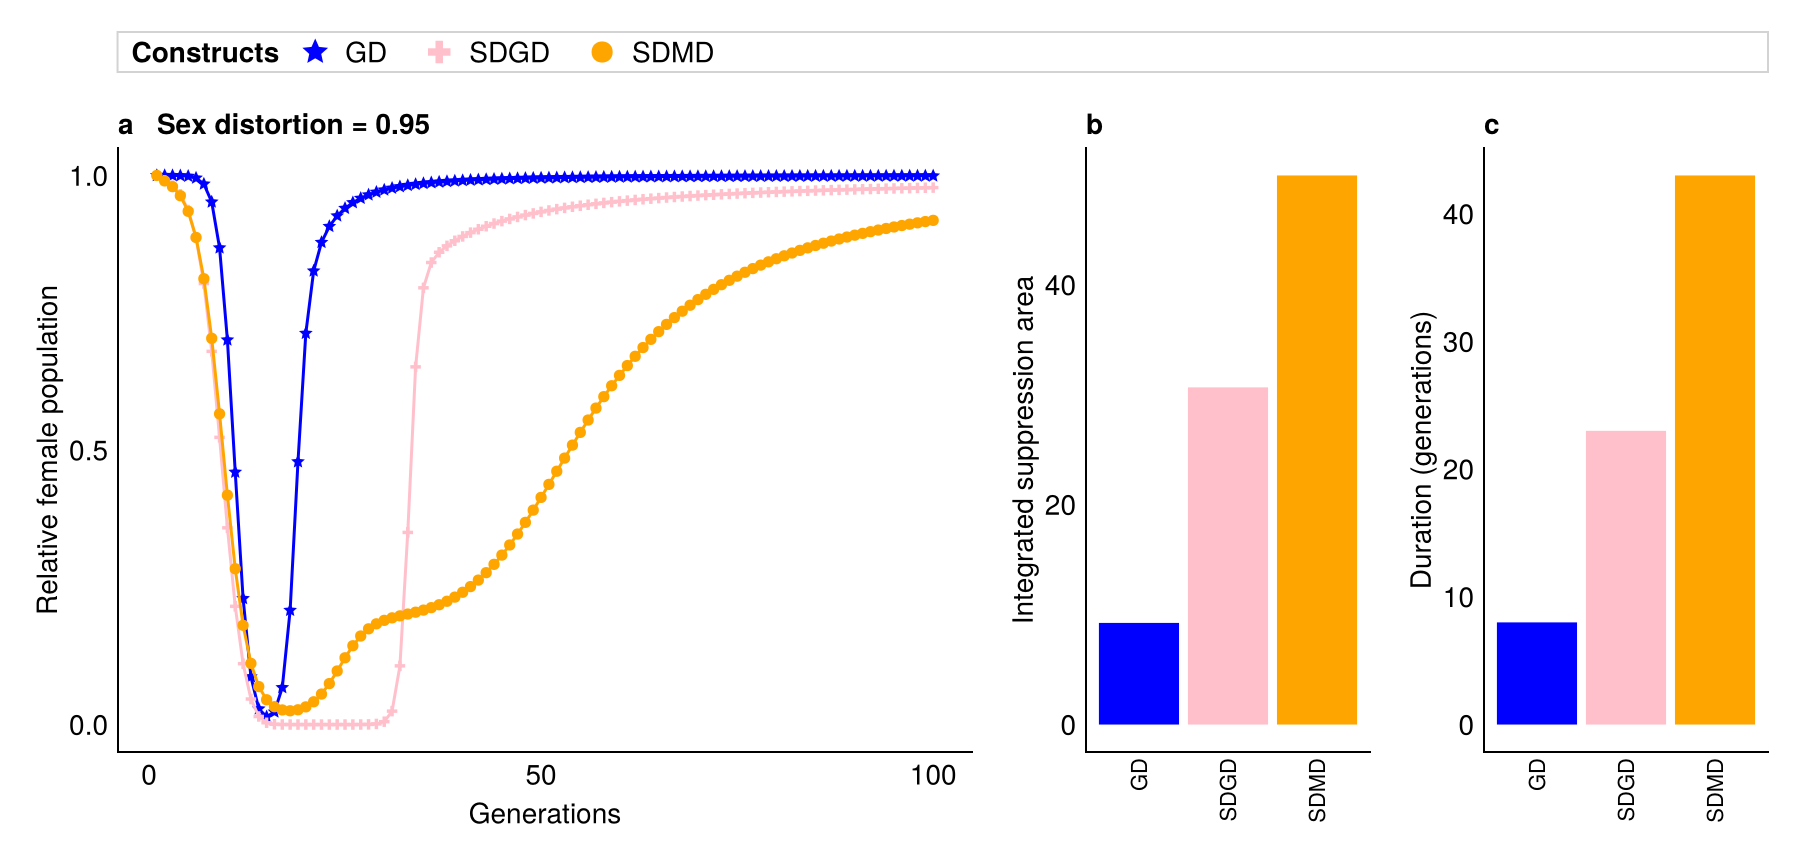

In [269]:
#IMPACT OF THE FITNESS ON THE POPULATION DYNAMICS (SEX DISTORTION =0.9, 0.99)
#b = 0.005, and HNEJ rates j= 0.035
f=Figure(size=(900,430))
#supertitle=Label(f[0,1:3], "Sex distortion and W/D female fitness effects on population suppression",fontsize=16,halign=:left)
ax1=Axis(f[1,1],title="a   Sex distortion = 0.95",titlealign=:left,ylabel="Relative female population",xlabel="Generations")
gen=100

mods=ADD1_F_095
modsI=ADD1_I_095
col6=:pink
col7=:orange
col5=RGBf(0.5, 0.2, 0.8)#cgrad(:viridis, categorical=true,3)[3]
cols17=[colW2[1],col6,col7]

labelt= ["GD","SDGD","SDMD"];
marks=[:star5,:cross,:circle]
marksz=[8,7,8,5,1]
lnst=[:solid,:solid,:solid]

n=10^15

for i in 1:3
    #band!(ax1,1:gen,mods[i][1][1:gen]./(0.5*10^10),repeat([1],gen),color=(cols17[i],0.15))
    scatterlines!(ax1,1:gen,mean([mods[i][j][1:gen]./(0.5*n) for j in 1:rep]) ,color=(cols17[i]),marker=marks[i],markersize=marksz[i])
    #lines!(ax1,1:gen,mean([ADD1_F_095_A[i][j][1:gen]./(0.5*n) for j in 1:rep]) ,color=(cols17[i]),marker=marks[i],linestyle=:dash,markersize=marksz[i])
end


ax3=Axis(f[1,2],title="b  ",ylabel="Integrated suppression area",xticks=(1:3,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)
is=[modsI[i][1][end] for i in 1:3]
barplot!(ax3,1:3,is,color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)#,direction=:x,color=col66)


ax5=Axis(f[1,3],title="c  ",ylabel="Duration (generations)",xticks=(1:3,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)
ts=[TRest_095[i] for i in 1:3]
barplot!(ax5,1:3,ts,color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)

leg=[MarkerElement(marker=marks[i],markersize=15,color=cols17[i]) for i in 1:3];
Legend(f[0, 1], leg, labelt,"Constructs",titleposition=:left,orientation = :horizontal,padding=(7,7,0,0),halign=:left)
Box(f[0, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)

colsize!(f.layout, 1, Relative(3.6/6))
colsize!(f.layout, 2, Relative(1.2/6))
colsize!(f.layout, 3, Relative(1.2/6))
save(string(dir1,"Figure1_SDLoss_v1_NEW.png"),f)
f

In [15]:
b_vec=[0.0016,0.001]
[Runs_Nosp_dx2(;N=N0,r1=r_SDMD,rep=rep,C=c_SDMD,B=b,J=j_SDMD,F=12,hf=1,hN=0,hm=0,A=0,filename1="dx2EmpB") for b in  b_vec];
[Runs_Nosp_dx(;N=N0,r1=r_SDGD,rep=rep,C=c_SDGD,B=b,J=j_SDGD,F=12,hf=0.38,hN=0,hm=0,A=0,filename1="sdgdEmpB") for b in b_vec];
[Runs_Nosp_dx(;N=N0,r1=0.5,rep=rep,C=c_GD,B=b,J=j_GD,F=12,hf=0,hN=0,hm=0,A=0,filename1="gdEmpB") for b in b_vec];

In [14]:
b_vec=[0.0016,0.001]
DXmods_Balleles=[
    [
    load(string(dir1,"gdEmpB_m0.5_hf0_hN0_hm0_A0_C0.966_B",b,"_J0.035.jld2"))["models1"][1],
    load(string(dir1,"sdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C0.9576_B",b,"_J0.0392.jld2"))["models1"][1],
    load(string(dir1,"dx2EmpB_m0.914_hf1_hN0_hm0_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1]
    ] for b in b_vec];

DXmodsI_B=[
    [
    load(string(dir1,"IntgdEmpB_m0.5_hf0_hN0_hm0_A0_C0.966_B",b,"_J0.035.jld2"))["models1"][1],
    load(string(dir1,"IntsdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C0.9576_B",b,"_J0.0392.jld2"))["models1"][1],
    load(string(dir1,"Intdx2EmpB_m0.914_hf1_hN0_hm0_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1]

    ] for b in b_vec];
DXmodsF_B=[
    [
    load(string(dir1,"FgdEmpB_m0.5_hf0_hN0_hm0_A0_C",c_GD,"_B",b,"_J",j_GD,".jld2"))["models1"][1],
    load(string(dir1,"FsdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C",c_SDGD,"_B",b,"_J",j_SDGD,".jld2"))["models1"][1],
    load(string(dir1,"Fdx2EmpB_m0.914_hf1_hN0_hm0_A0_C",c_SDMD,"_B",b,"_J",j_SDMD,".jld2"))["models1"][1]  
    ] for b in b_vec];

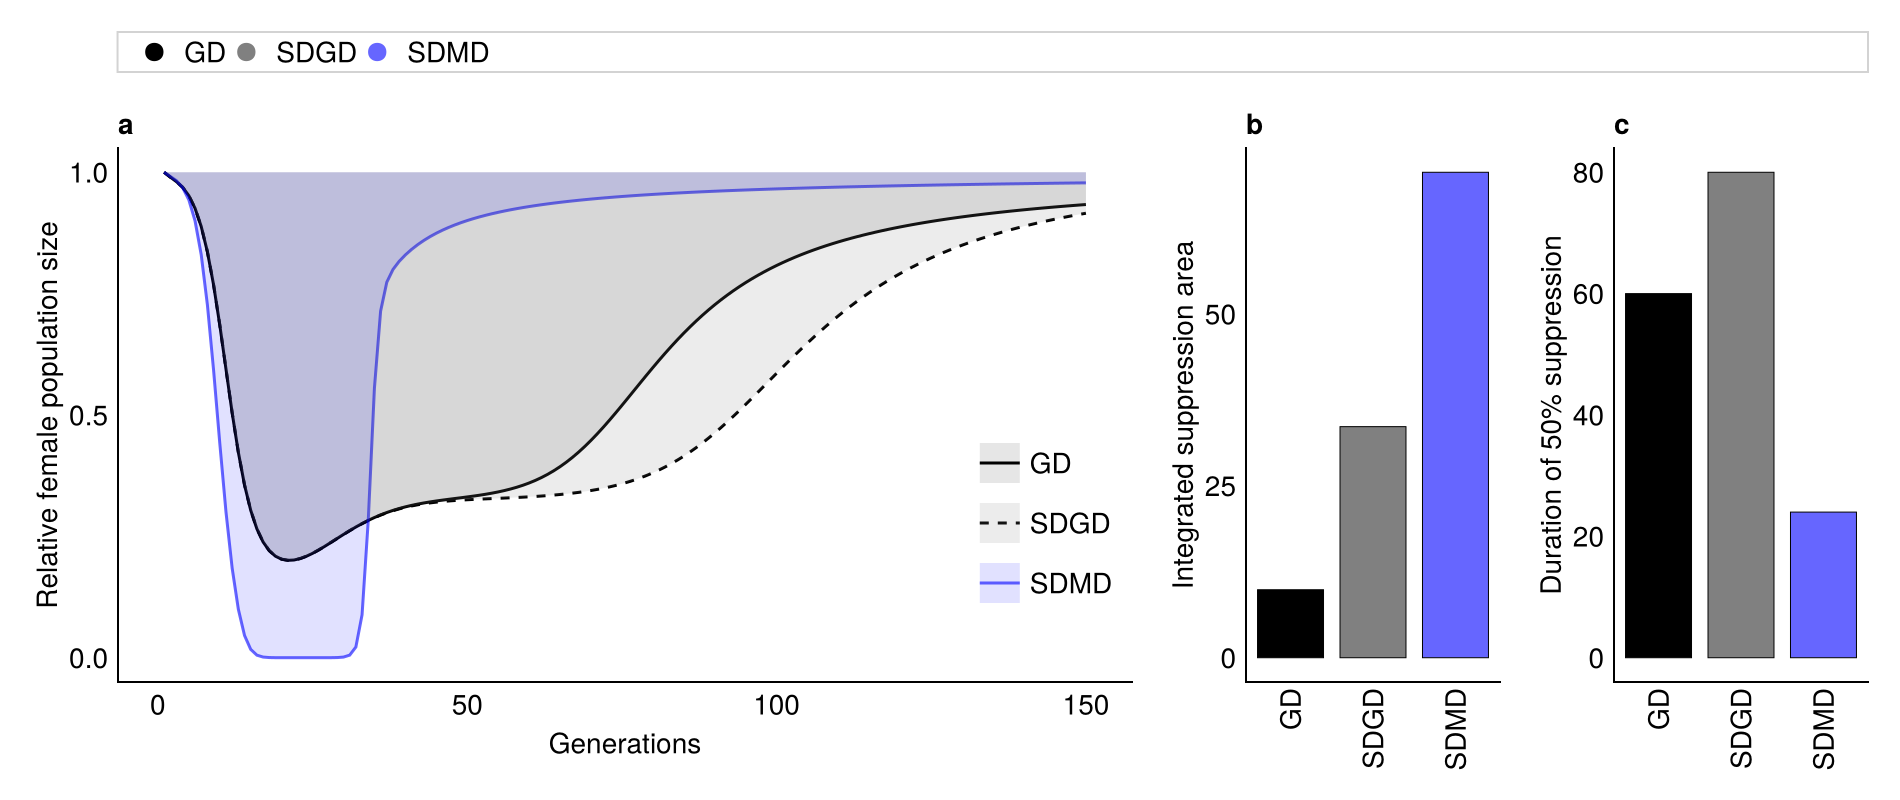

In [20]:
p=0.5
b=1
#DYNAMICS, INTEGRATED SUPPRESSION AREA AND DURATION OF PROTECTION FOR 3 EMPIRICAL CONSTRUCTS
f=Figure(size=(950,400))

n=10^15
colSDMD=(cgrad(:winter, categorical=true,3)[1],0.6)
gen=150
ax1=Axis(f[1,1],title="a ", ylabel="Relative female population size",xlabel="Generations",titlealign=:left)

lines!(ax1,1:gen,sum.(DXmods_Balleles[b][1][1])[1:gen]./(0.5*n),label="GD",color=:black)
lines!(ax1,1:gen,sum.(DXmods_Balleles[b][2][1])[1:gen]./(0.5*n),label="SDGD",color=:black, linestyle=:dash)
lines!(ax1,1:gen,sum.(DXmods_Balleles[b][3][1])[1:gen]./(0.5*n),label="SDMD",color=colSDMD)

band!(ax1,1:gen,sum.(DXmods_Balleles[b][1][1])[1:gen]./(0.5*n),repeat([1],gen),alpha=0.1,color=(:black,0.1),label="GD")
band!(ax1,1:gen,sum.(DXmods_Balleles[b][2][1])[1:gen]./(0.5*n),repeat([1],gen),alpha=0.1,color=(:grey,0.15),label="SDGD")
band!(ax1,1:gen,sum.(DXmods_Balleles[b][3][1])[1:gen]./(0.5*n),repeat([1],gen),alpha=0.2,color=(colSDMD,0.2),label="SDMD")

axislegend("",position=:rb,merge = true,rowgap = 10,framewidth=10,margin=(10, 10, 40,10))
ax2=Axis(f[1,2],title="b  ",ylabel="Integrated suppression area",xticks=(1:3,["GD","SDGD","SDMD"]),xticklabelrotation=pi/2,titlealign=:left)
y=[DXmodsI_B[b][1][end],DXmodsI_B[b][2][end],DXmodsI_B[b][3][end]]
col3=[:black,:grey,colSDMD]

barplot!(ax2,1:3, y,color=col3,strokecolor = :black, strokewidth = 0.5)
ax3=Axis(f[1,3],title="c  ",ylabel="Duration of 50% suppression",xticks=(1:3,["GD","SDGD","SDMD"]),titlealign=:left,xticklabelrotation=pi/2)
TRestEmp= [TimePerc(DXmodsF_B[b][h];perc=p)[2]-TimePerc(DXmodsF_B[b][h];perc=p)[1] for h in 1:3];
barplot!(ax3,1:3,TRestEmp[1:3],color=[:black,:grey,colSDMD],strokecolor = :black, strokewidth = 0.5)#,direction=:x)

colsize!(f.layout, 1, Relative(4/6))
colsize!(f.layout, 2, Relative(1/6))
colsize!(f.layout, 2, Relative(1/6))

leg=[MarkerElement(color = :black,markersize=13,marker=:circle),MarkerElement(color = :grey,markersize=13,marker=:circle),MarkerElement(color = colSDMD,markersize=13,marker=:circle)];
Legend(f[0, 1:3], leg, ["GD","SDGD","SDMD"],"",titleposition=:left,orientation = :horizontal,padding=(0,0,0,0),halign=:left,colgap =0,tellwodth=false)#,framecolor=:lightgrey,framevisible=true)

Box(f[0, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)
#save(string(dir1,"EmpComparisonv1_b00016_new.png"),f)
f

GENERAL MODELLING SDMD-LE (SDMD-HI)

In [ ]:
#[Runs_Nosp_dx2(;N=N0,r1=r_SDMD,rep=500,C=c,B=0.005,J=j_SDMD,F=12,hf=1,hN=0,hm=0.09,A=0,filename1="dx2Emp") for c in [0.75,0.8,0.9,0.95,0.99]];

ADDITIONAL SIMULATIONS 13/03/2025

GENERAL modelling

In [ ]:

ADD1_I_095=[
load(string(dir1,"Intdgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdx_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],   
load(string(dir1,"Intdx_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],   
load(string(dir1,"IntdxHI_m0.95_hf1_hN1_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],  
load(string(dir1,"IntdxHI_m0.95_hf1_hN1_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],  
load(string(dir1,"Intdx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdx2_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Intdsdgd_m0.95_hf0_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],
];

ADD1_F_095=[
load(string(dir1,"Fdgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"Fdx_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],  
load(string(dir1,"Fdx_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],  
load(string(dir1,"FdxHI_m0.95_hf1_hN1_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"FdxHI_m0.95_hf1_hN1_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"Fdx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"Fdx2_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"], 
load(string(dir1,"Fdsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],
load(string(dir1,"Fdsdgd_m0.95_hf0_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"]   
];

ADD1_095=[
load(string(dir1,"dgd_m0.5_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], #gd
load(string(dir1,"dx_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],   #sdmd-le 
load(string(dir1,"dx_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],   #sdmd-le a
load(string(dir1,"dxHI_m0.95_hf1_hN1_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],   #sdmd-hi
load(string(dir1,"dxHI_m0.95_hf1_hN1_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"],   #sdmd-hi a
load(string(dir1,"dx2_m0.95_hf1_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"], #sdmd
load(string(dir1,"dx2_m0.95_hf1_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"], #sdmd a
load(string(dir1,"dsdgd_m0.95_hf0_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"],  #sdgd 
load(string(dir1,"dsdgd_m0.95_hf0_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"]   #sdgd a
];

In [ ]:
#duration of protection 
p=0.5
TRest_095= [mean([TimePerc(ADD1_F_095[h][i];perc=p)[2]-TimePerc(ADD1_F_095[h][i];perc=p)[1] for i in 1:rep]) for h in eachindex(ADD1_F_095)];

In [ ]:
#IMPACT OF THE FITNESS ON THE POPULATION DYNAMICS (SEX DISTORTION =0.9, 0.99)
#b = 0.005, and HNEJ rates j= 0.035
f=Figure(size=(900,370))
#supertitle=Label(f[0,1:3], "Sex distortion and W/D female fitness effects on population suppression",fontsize=16,halign=:left)
ax1=Axis(f[1,1],title="a   Sex distortion = 0.95",titlealign=:left,ylabel="Relative female population",xlabel="Generations")
gen=100
colW=(cgrad(:winter, categorical=true,3)[1],0.9)#(cgrad(:blues,5,categorical=true)[1],1)
colW2=[(cgrad(:winter,3,categorical=true)[1],(a+1)/5) for a in 5:-1:1]#(cgrad(:winter,3,categorical=true)[1],0.7)

mods=ADD1_F_095
modsI=ADD1_I_095
col6=:pink
col7=:orange
col5=RGBf(0.5, 0.2, 0.8)#cgrad(:viridis, categorical=true,3)[3]
cols17=[colW2[1],:green,col5,col6,col7]
labelt= ["GD","SDMD-LE","SDMD-HI","SDMD","SDGD"];
marks=[:star5,:utriangle,:cross,:circle,:rect]
marksz=[8,7,8,5,1]
for i in [2,4,5,3,1]
    #band!(ax1,1:gen,mods[i][1][1:gen]./(0.5*10^10),repeat([1],gen),color=(cols17[i],0.15))
    scatterlines!(ax1,1:gen,mean([mods[i][j][1:gen]./(0.5*10^10) for j in 1:rep]),color=(cols17[i]),marker=marks[i],markersize=marksz[i])
end

ax3=Axis(f[1,2],title="b   Suppression",ylabel="Integrated area",xticks=(1:5,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)#xticklabelrotation=pi/2,
barplot!(ax3,1:5,[mean([modsI[i][j][end] for j in 1:rep]) for i in 1:5],color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)#,direction=:x,color=col66)


ax5=Axis(f[1,3],title="c   50% suppression",ylabel="Duration (generations)",xticks=(1:5,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)
barplot!(ax5,1:5,TRest_095[1:5],color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)

leg=[MarkerElement(color = cols17[i],marker=marks[i],markersize=16, strokewidth = 0) for i in 1:5];
Legend(f[0, 1], leg, labelt,"Female Fitness",titleposition=:left,orientation = :horizontal,padding=(7,7,0,0),halign=:left)#,framecolor=:lightgrey,framevisible=true)
Box(f[0, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)

colsize!(f.layout, 1, Relative(3.6/6))
colsize!(f.layout, 2, Relative(1.2/6))
colsize!(f.layout, 3, Relative(1.2/6))
#save(string(dir1,"Figure1_Comparison_095sdNoBand.png"),f)
f

In [ ]:
#IMPACT OF THE FITNESS ON THE POPULATION DYNAMICS (SEX DISTORTION =0.9, 0.99)
#b = 0.005, and HNEJ rates j= 0.035
f=Figure(size=(900,370))
#supertitle=Label(f[0,1:3], "Sex distortion and W/D female fitness effects on population suppression",fontsize=16,halign=:left)
ax1=Axis(f[1,1],title="a   Sex distortion = 0.95",titlealign=:left,ylabel="Relative female population",xlabel="Generations")
gen=100
colW=(cgrad(:winter, categorical=true,3)[1],0.9)#(cgrad(:blues,5,categorical=true)[1],1)
colW2=[(cgrad(:winter,3,categorical=true)[1],(a+1)/5) for a in 5:-1:1]#(cgrad(:winter,3,categorical=true)[1],0.7)

mods=ADD1_F_095
modsI=ADD1_I_095
col6=:pink
col7=:orange
col5=RGBf(0.5, 0.2, 0.8)#cgrad(:viridis, categorical=true,3)[3]
cols17=[colW2[1],:green,col5,col6,col7]
labelt= ["GD","SDMD-LE","SDMD-HI","SDMD","SDGD"];
marks=[:star5,:utriangle,:cross,:circle,:rect]
marksz=[8,7,8,5,1]
for i in [2,4,5,3,1]
    band!(ax1,1:gen,mean([mods[i][j][1:gen]./(0.5*10^10) for j in 1:rep]),repeat([1],gen),color=(cols17[i],0.1))
    scatterlines!(ax1,1:gen,mean([mods[i][j][1:gen]./(0.5*10^10) for j in 1:rep]),color=(cols17[i]),marker=marks[i],markersize=marksz[i])
end

ax3=Axis(f[1,2],title="b   Suppression",ylabel="Integrated area",xticks=(1:5,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)#xticklabelrotation=pi/2,
barplot!(ax3,1:5,[mean([modsI[i][j][end] for j in 1:rep]) for i in 1:5],color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)#,direction=:x,color=col66)


ax5=Axis(f[1,3],title="c   50% suppression",ylabel="Duration (generations)",xticks=(1:5,labelt),xticklabelrotation=pi/2,titlealign=:left,xticklabelsize=11)
barplot!(ax5,1:5,TRest_095[1:5],color=cols17,gap=0.1,strokecolor = :black, strokewidth = 0)

leg=[MarkerElement(color = cols17[i],marker=marks[i],markersize=16, strokewidth = 0) for i in 1:5];
Legend(f[0, 1], leg, labelt,"Female Fitness",titleposition=:left,orientation = :horizontal,padding=(7,7,0,0),halign=:left)#,framecolor=:lightgrey,framevisible=true)
Box(f[0, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)

colsize!(f.layout, 1, Relative(3.6/6))
colsize!(f.layout, 2, Relative(1.2/6))
colsize!(f.layout, 3, Relative(1.2/6))
#save(string(dir1,"Figure1_Comparison_095sdBAndFertiles.png"),f)
f

In [ ]:
b_vec=[0.001,0.005,0.01]

In [ ]:
[Runs_Nosp_dx(;N=N0,r1=0.5,rep=50,C=c,B=0.005,J=j_GD,F=12,hf=0,hN=0,hm=0,A=0,filename1="gdEmpC")  for c in [0.75,0.8,0.9,0.95,0.99]];
[Runs_Nosp_dx(;N=N0,r1=r_SDMD,rep=50,C=c,B=0.005,J=j_SDMD,F=12,hf=1,hN=0,hm=0,A=0,filename1="dxEmpC")  for c in [0.75,0.8,0.9,0.95,0.99]];
[Runs_Nosp_dx(;N=N0,r1=r_SDGD,rep=50,C=c,B=0.005,J=j_SDGD,F=12,hf=0.38,hN=0,hm=0,A=0,filename1="sdgdEmpC")  for c in [0.75,0.8,0.9,0.95,0.99]];
[Runs_Nosp_dx(;N=N0,r1=r_SDMD,rep=50,C=c,B=0.005,J=j_SDMD,F=12,hf=1,hN=1,hm=0,A=0,filename1="dxEmpHIC")  for c in [0.75,0.8,0.9,0.95,0.99]];
[Runs_Nosp_dx2(;N=N0,r1=r_SDMD,rep=50,C=c,B=0.005,J=j_SDMD,F=12,hf=1,hN=0,hm=0,A=0,filename1="dx2EmpC") for c in [0.75,0.8,0.9,0.95,0.99]];

In [ ]:
[Runs_Nosp_dx(;N=N0,r1=r_SDMD,rep=5,C=c_SDMD,B=b,J=j_SDMD,F=12,hf=1,hN=1,hm=0,A=0,filename1="dxEmpHIB") for b in b_vec];
[Runs_Nosp_dx2(;N=N0,r1=r_SDMD,rep=5,C=c_SDMD,B=b,J=j_SDMD,F=12,hf=1,hN=0,hm=0,A=0,filename1="dx2EmpB") for b in  b_vec];
[Runs_Nosp_dx(;N=N0,r1=r_SDMD,rep=5,C=c_SDMD,B=b,J=j_SDMD,F=12,hf=1,hN=0,hm=0,A=0,filename1="dxEmpB") for b in  b_vec];
[Runs_Nosp_dx(;N=N0,r1=r_SDGD,rep=5,C=c_SDGD,B=b,J=j_SDGD,F=12,hf=0.38,hN=0,hm=0,A=0,filename1="sdgdEmpB") for b in b_vec];
[Runs_Nosp_dx(;N=N0,r1=0.5,rep=5,C=c_GD,B=b,J=j_GD,F=12,hf=0,hN=0,hm=0,A=0,filename1="gdEmpB") for b in b_vec];

In [ ]:
DXmods_Balleles=[
    [
    load(string(dir1,"dx2EmpB_m0.914_hf1_hN0_hm0_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"dx2idEmpB_m0.914_hf1_hN0_hm0_A0_C0.95_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"sdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C0.9576_B",b,"_J0.0392.jld2"))["models1"][1],
    load(string(dir1,"gdEmpB_m0.5_hf0_hN0_hm0_A0_C0.966_B",b,"_J0.035.jld2"))["models1"][1],
    load(string(dir1,"dxEmpHIB_m0.914_hf1_hN1_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"dxEmpB_m0.914_hf1_hN0_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1]]
     for b in b_vec];

DXmodsI_B=[#IntsdgdEmp_m0.93_hf0.38_hN0_hm0.15_A0_C0.7556_B0.005_J0.0392
    [
    load(string(dir1,"Intdx2EmpB_m0.914_hf1_hN0_hm0_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"Intdx2idEmpB_m0.914_hf1_hN0_hm0_A0_C0.95_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"IntsdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C0.9576_B",b,"_J0.0392.jld2"))["models1"][1],
    load(string(dir1,"IntgdEmpB_m0.5_hf0_hN0_hm0_A0_C0.966_B",b,"_J0.035.jld2"))["models1"][1],
    load(string(dir1,"IntdxEmpHIB_m0.914_hf1_hN1_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"IntdxEmpB_m0.914_hf1_hN0_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1]]
     for b in b_vec];
DXmodsF_B=[
    [
    load(string(dir1,"Fdx2EmpB_m0.914_hf1_hN0_hm0_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"Fdx2idEmpB_m0.914_hf1_hN0_hm0_A0_C0.95_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"FsdgdEmpB_m0.93_hf0.38_hN0_hm0_A0_C0.9576_B",b,"_J0.0392.jld2"))["models1"][1],
    load(string(dir1,"FgdEmpB_m0.5_hf0_hN0_hm0_A0_C0.966_B",b,"_J0.035.jld2"))["models1"][1],
    load(string(dir1,"FdxEmpHIB_m0.914_hf1_hN1_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1],
    load(string(dir1,"FdxEmpB_m0.914_hf1_hN0_hm0.09_A0_C0.7556_B",b,"_J0.0206.jld2"))["models1"][1]]
     for b in b_vec];

In [ ]:
#INTEGRATED SUPPRESSION AREA FOR THE 3 STRATEGIES (CONSTRUCTS)
#RANGE OF B PARAMETERS RANGE
p=0.5
TRest_B= [[TimePerc(DXmodsF_B[b][h];perc=p)[2]-TimePerc(DXmodsF_B[b][h];perc=p)[1] for h in eachindex(DXmodsF_B[b])] for b in eachindex(b_vec)];

C=3

g=Figure(size=(850,450))
#supertitle=Label(g[-1,1:2],"Mean intergated suppression area comparison",halign=:left,fontsize=17)
f=g[1,1]=GridLayout()
ax1=Axis(f[1,1],xticks=(1:length(b_vec),string.(b_vec)),title="a ",titlealign=:left,ylabel="Integrated suppression area (%)",xlabel="Fraction of functional resistance (b)")
x=repeat(1:length(b_vec),C)
dodge=repeat(1:C,inner=length(b_vec))
col3=[colSDMD,colSDMD,colSDMD,:grey, :black]

y=[DXmodsI_B[b][cs][end]  for cs in 1:C for b in eachindex(b_vec)]#reduce(vcat,[last.(CumBSDMD),last.(CumBSDGD),last.(CumBGD)])
barplot!(ax1,x, y,dodge=dodge, color=col3[dodge],strokecolor = :black, strokewidth = 0.5)

fC=g[1,2]=GridLayout()
ax2=Axis(fC[1,1],xticks=(1:length(b_vec),string.(b_vec)),title="b ",titlealign=:left,ylabel="Duration of 50% protection",xlabel="Fraction of functional resistance (b)")
#x=repeat(1:3,3)
#dodge=repeat(1:3,inner=3)
#col3=[colSDMD,:grey, :black]
y=[TRest_B[b][cs][1][end]  for cs in 1:C for b in eachindex(b_vec)]
barplot!(ax2,x, y,dodge=dodge, color=col3[dodge],strokecolor = :black, strokewidth = 0.5)

leg=[MarkerElement(color = colSDMD,markersize=18,marker=:circle),MarkerElement(color = colSDMD,markersize=18,marker=:circle),MarkerElement(color = colSDMD,markersize=18,marker=:circle),MarkerElement(color = :grey,markersize=18,marker=:circle),MarkerElement(color = :black,markersize=18,marker=:circle)];
Legend(g[0, 1:2], leg, ["SDMD","SDMDc","SDMDh","SDGD","GD"],"Construct",titleposition=:left,orientation = :horizontal,padding=(7,7,0,0),halign=:left)#,framecolor=:lightgrey,framevisible=true)
#colsize!(g.layout, 1, Relative(2.2/5))
#colsize!(g.layout, 2, Relative(2.2/5))
Box(g[0, 1:2],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)

#save(string(dir1,"SuppressionAreaBonlyp067.png"),g)
g

In [ ]:
[Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0,A=0,filename1="dx") for h in [0:0.05:1;]];
[Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0,A=0.01,filename1="dx") for h in [0:0.05:1;]];


DXmodsFnew=[[load(string(dir1,"Fdx_m0.9_hf",h,"_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]],
[load(string(dir1,"Fdx_m0.9_hf",h,"_hN0_hm0_A0.001_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]],
[load(string(dir1,"Fdx_m0.9_hf",h,"_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]]]
DXmodsInew=[[load(string(dir1,"Intdx_m0.9_hf",h,"_hN0_hm0_A0_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]],
[load(string(dir1,"Intdx_m0.9_hf",h,"_hN0_hm0_A0.001_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]],
[load(string(dir1,"Intdx_m0.9_hf",h,"_hN0_hm0_A0.01_C0.95_B0.005_J0.035.jld2"))["models1"] for h in [0:0.05:1;]]];

Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0.1,A=0,filename1="dxHI") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hm=0.25,A=0,filename1="dxHI") ;

DXHImods1F_hm01=load(string(dir1,"FdxHI_m0.9_hf",1,"_hN1_hm0.1_A0_C0.95_B0.005_J0.035.jld2"))["models1"];
DXHImods1F_hm025=load(string(dir1,"FdxHI_m0.9_hf",1,"_hN1_hm0.25_A0_C0.95_B0.005_J0.035.jld2"))["models1"];


In [ ]:
f=Figure(size=(900,350))
ax1=Axis(f[1,1],title="Male fitness=1",titlealign=:left)
ax2=Axis(f[1,2],title="Male fitness=0.9",titlealign=:left)
ax3=Axis(f[1,3],title="Male fitness=0.75",titlealign=:left)
Label(f[0,1:3], text="Integrated suppression",fontsize=17)
Label(f[2,1:3], text="Heterozygous female fitness")
Label(f[1,0], text="Integrated suppression", rotation=pi/2,tellheight=false)
lnst=[:solid,:dot,:dash]
for l in 1:3
    lines!(ax1, 1 .-h_vec2, [DXmodsInew[l][h][1][end] for h in eachindex(DXmodsInew[1])], linestyle=lnst[l],color=:blue)
    lines!(ax2, 1 .-h_vec2, [DXmodsInew_hm01[l][h][1][end] for h in eachindex(DXmodsInew[1])], linestyle=lnst[l],color=:blue)
    lines!(ax3, 1 .-h_vec2, [DXmodsInew_hm025[l][h][1][end] for h in eachindex(DXmodsInew[1])], linestyle=lnst[l],color=:blue)
    
    for j in 1:500
        t=[TimePerc(DXmodsFnew[l][h][j];perc=0.5) for h in eachindex(DXmodsFnew[1])]
        #lines!(ax2, 1 .-h_vec2, [t[h][2]-t[h][1] for h in eachindex(DXmodsInew[1])], linestyle=lnst[l])
    end
end
for a in [ax1,ax2,ax3] ylims!(a,10,40);end
leg=[LineElement(color=:black, linestyle=lnst[i]) for i in 1:3]
Legend(f[1,4], leg, ["a=0%","a=0.1%","a=1%"],"Loss rates",tellheight=false)
f

Spatial 1

In [30]:
Fitness_vec=[Fitness_input1(;sigma=0,s=1,h=1,hN=0,hDR=1,show=false,M=4),
Fitness_input1(;sigma=0,s=1,h=1,hN=0,hDR=0,show=false,M=4),
Fitness_input1(;sigma=0,s=1,h=1,hN=1,hDR=1,show=false,M=4),
Fitness_input1(;sigma=0,s=1,h=0,hN=0,hDR=0,show=false,M=4),
Fitness_input1(;sigma=0,s=1,h=0,hN=0,hDR=0,show=false,M=4)
]
sd_vec=[0.9,0.9,0.9,0.9,0.5];
labelt=["SDMD","SDMD-LE","SDMD-HI","SDGD","GD"];
flnt=["sdmd","sdmdle","sdmdhi","sdgd","gd"];

In [83]:
Sp_run=function(;wmf,SexDistortion=0.5,B=0.001, C=0.95,J=0.05,Npop=10^6,F=12,rep=500,maxgen=500,dia=10,mig=0.01,Release=0.25,Release_sites=[],M=4,M2=10,filename="Sp",homing=:b,beta=100)
    M2 =Int(M*(M+1)/2)
    R2_temp=[]
    if length(Release_sites)<1 Release_sites=[dia+1]; end
    fn=string(filename,"_N",log10(Npop),"_radius_",dia, "_B_",B,"_J",J,"_C_",C,"_sd_",SexDistortion,"_mig_",mig,".", "jld2")
    e=E_Make(;c_m=C,j_m=J,a_m=1,b_m=B,c_f=C,j_f=J,a_f=1,b_f=B,M=M,homing=homing)
    p_in=1-mig
    A,Release_sites0,Nsites,N,h_list,d=Test_input(;num=dia, Nreleases=1, Npop=Npop,p_in=p_in,maxdist=1,rebound=true);
    Nfv, Nmv=Initial_vec(;N=Npop,Nsites=Nsites,Release_sites=Release_sites,pm=Release,M=4);
    alpha= repeat([round(Int64, F* round(Int64,Npop/Nsites) / (F  / 2 - 1) / 2)],Nsites)
    @showprogress 1 for i in 1:rep
        mod=Model_sp(;Ntf_init=Nfv,Ntm_init=Nmv,A=A,wmf=wmf,E=e,alpha=alpha,maxgen=maxgen,mu_mig=1,Model=2,d=d,Release_sites=Release_sites,maxdist=1,M=4,mD_sex=SexDistortion,beta=beta);        
        push!(R2_temp,mod)
    end
    jldsave(fn, true; models1=R2_temp)
end
Sp_run_inter=function(;wmf,SexDistortion=0.5,B=0.001, C=0.95,J=0.05,F=12,Npop=10^6,rep=500,maxgen=500,dia=10,mig=0.01,Release=0.25,Release_sites=[],M=4,M2=10,filename="Sp",homing=:b,beta=100)
    M2 =Int(M*(M+1)/2)
    R2_temp=[]
    if length(Release_sites)<1 Release_sites=[dia+1]; end
    #Release_sites=[dia+1]
    fn=string(filename,"_N",log10(Npop),"_radius_",dia, "_B_",B,"_J",J,"_C_",C,"_sd_",SexDistortion,"_mig_",mig,".", "jld2")
    e=E_Make(;c_m=C,j_m=J,a_m=1,b_m=B,c_f=C,j_f=J,a_f=1,b_f=B,M=M,homing=homing)
    p_in=1-mig
    A,Release_sites0,Nsites,N,h_list,d=Test_input(;num=dia, Nreleases=1, Npop=Npop,p_in=p_in,maxdist=1,rebound=true);
    Nfv, Nmv=Initial_vec(;N=Npop,Nsites=Nsites,Release_sites=Release_sites,pm=Release,M=4);
    alpha= repeat([round(Int64, F* round(Int64,Npop/Nsites) / (F  / 2 - 1) / 2)],Nsites)
    @showprogress 1 for i in 1:rep #Release_sites=Release_sites
        mod=Model_sp_inter(;Ntf_init=Nfv,Ntm_init=Nmv,A=A,wmf=wmf,E=e,alpha=alpha,maxgen=maxgen,mu_mig=1,Model=2,d=d,Release_sites=Release_sites,maxdist=1,M=4,mD_sex=SexDistortion,beta=beta);        
        push!(R2_temp,mod)
    end
    jldsave(fn, true; models1=R2_temp)
end

#882 (generic function with 1 method)

In [29]:
using CairoMakie
set_theme!(theme_minimal()) 
PlotSpNall=function(fig,N_list;frame=(1,1),frame_title="",mvec=m_vec, nl,maxgen=500, horiz=true,top=1.3)
    f=fig[frame[1],frame[2]]=GridLayout()
    rep=length(N_list[1])
    mn=length(m_vec)
    w_colw=cgrad(:lighttest,mn,categorical=true)[1:mn]
    if horiz ax1=[Axis(f[1,i], title = string(m_vec[i])) for i in 1:mn];
    else ax1=[Axis(f[i,1], title = string(m_vec[i]),ylabel=string("10^",nl)) for i in 1:mn];
    end
    for a in ax1 ylims!(a,0,top);end
    NTot=2
    gen=maxgen
    for j in 1:rep
        for m in 1:mn
            lines!(ax1[m],1:gen,N_list[m][j][1:gen]./(NTot./2),color= w_colw[m], linewidth=1)
        end
    end
    return f
end  

Nf_all=function(modlist;maxgen=500,scale=true)
    if scale res= [[[sum(sum(mod[1,t,:,:])) for t in 1:maxgen]./sum(sum(mod[1,1,:,:])) for mod in modlist[i]] for i in 1:length(modlist)]
    else res= [[[sum(sum(mod[1,t,:,:])) for t in 1:maxgen] for mod in modlist[i]] for i in 1:length(modlist)]
    end
    return res
end
Nm_all=function(modlist;maxgen=500,scale=true)
    if scale res= [[[sum(sum(mod[2,t,:,:])) for t in 1:maxgen]./sum(sum(mod[1,1,:,:])) for mod in modlist[i]] for i in 1:length(modlist)]
    else res= [[[sum(sum(mod[2,t,:,:])) for t in 1:maxgen] for mod in modlist[i]] for i in 1:length(modlist)]
    end
    return res
end

Nsize_a=function(model;maxt=300,sex="f", d,Nsites,maxd=10,diam=10) ##population per area 
    dv=[Matrix(d)[i,:] for i in 1:Nsites]
    h=[Hexagon1(;n=dis) for dis in 1:maxd]  #list of hexagons
    hd=[[Matrix(h[dis][4])[i,:] for i in 1:h[dis][3]] for dis in 1:maxd]
    lvec = [[dv[j] in (hd[dis] .+ [dv[diam+1]]) for j in 1:Nsites] for dis in 1:maxd];
    sites_ind=vcat([[diam+1]],[[1:Nsites;][lvec[dis]] for dis in 1:maxd])  #list of the sites included 
    if sex=="f" n_ind=[[sum([sum(model[1,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd+1]; end
    if sex=="m" n_ind=[[sum([sum(model[2,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd+1]; end
    if sex=="b" n_ind=[[sum([sum(model[2,t,s,:]).+sum(model[1,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd]; end
    return(n_ind)
end

Nsize_r0=function(;sex="f",maxd=10,diam=10) #population per radius 
    A,Release_sites,Nsites,N,h_list,d=Test_input(;num=diam, Nreleases=1, Npop=100,p_in=0.95,maxdist=1,rebound=true);
    dv=[Matrix(d)[i,:] for i in 1:Nsites]
    h=[Hexagon1(;n=dis) for dis in 1:maxd]  #list of hexagons
    hd=[[Matrix(h[dis][4])[i,:] for i in 1:h[dis][3]] for dis in 1:maxd]
    lvec = [[dv[j] in (hd[dis] .+ [dv[diam+1]]) for j in 1:Nsites] for dis in 1:maxd];
    sites_ind0=vcat([[]],[[1:Nsites;][lvec[dis]] for dis in 1:maxd])  #list of the sites included 
    sites_ind=vcat([[diam+1]],[setdiff(sites_ind0[dis+1],sites_ind0[dis]) for dis in 1:maxd])  #list of the sites included 
    return(sites_ind)
end
Nsize_r=function(model;maxt=300,sex="f", sites_ind,maxd=10,diam=10) #population per radius  
    if sex=="f" n_ind=[[sum([sum(model[1,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd+1]; end
    if sex=="m" n_ind=[[sum([sum(model[2,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd+1]; end
    if sex=="b" n_ind=[[sum([sum(model[1,t,s,:]).+sum(model[2,t,s,:])  for s in sites_ind[dis]]) for t in 1:maxt] for dis in 1:maxd]; end
    return(n_ind)
end
Duration_v2=function(Nr;maxt=300, perc=0.33,sex="f",maxd=5,d,Nsites,diam=5)
    Nr0=[Nr[1][dd][1] for dd in 1:maxd+1]
    res=[]
    for dd in 1:maxd+1
        temp=[]
        for j in eachindex(Nr)
            s=sum(Nr[j][dd][1:maxt].<=(Nr0[dd].*perc))
            push!(temp,s)
        end
        push!(res,temp)
    end
    return res
end
Size_r=function(;d,Nsites,maxd=10,diam=10) #population per radius 
    dv=[Matrix(d)[i,:] for i in 1:Nsites]
    h=[Hexagon1(;n=dis) for dis in 1:maxd]  #list of hexagons
    hd=[[Matrix(h[dis][4])[i,:] for i in 1:h[dis][3]] for dis in 1:maxd]
    lvec = [[dv[j] in (hd[dis] .+ [dv[diam+1]]) for j in 1:Nsites] for dis in 1:maxd];
    sites_ind0=vcat([[]],[[1:Nsites;][lvec[dis]] for dis in 1:maxd])  #list of the sites included 
    sites_ind=vcat([[diam+1]],[setdiff(sites_ind0[dis+1],sites_ind0[dis]) for dis in 1:maxd])  #list of the sites included 
    return length.(sites_ind)
end

#620 (generic function with 1 method)

In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    ##Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    #Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037


Progress: 100%|█████████████████████████████████████████| Time: 0:06:08
Progress: 100%|█████████████████████████████████████████| Time: 0:06:17
Progress: 100%|█████████████████████████████████████████| Time: 0:04:37
Progress: 100%|█████████████████████████████████████████| Time: 0:07:13
Progress: 100%|█████████████████████████████████████████| Time: 0:06:58


In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    ##Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.001,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    #Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037


Progress: 100%|█████████████████████████████████████████| Time: 0:06:08
Progress: 100%|█████████████████████████████████████████| Time: 0:06:17
Progress: 100%|█████████████████████████████████████████| Time: 0:04:37
Progress: 100%|█████████████████████████████████████████| Time: 0:07:13
Progress: 100%|█████████████████████████████████████████| Time: 0:06:58


In [66]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037


Progress: 100%|█████████████████████████████████████████| Time: 0:13:05
Progress: 100%|█████████████████████████████████████████| Time: 0:07:14
Progress: 100%|█████████████████████████████████████████| Time: 0:06:09
Progress: 100%|█████████████████████████████████████████| Time: 0:06:59
Progress: 100%|█████████████████████████████████████████| Time: 0:06:15


In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037


Progress: 100%|█████████████████████████████████████████| Time: 0:04:19
Progress: 100%|█████████████████████████████████████████| Time: 0:11:35
Progress: 100%|█████████████████████████████████████████| Time: 0:12:06
Progress: 100%|█████████████████████████████████████████| Time: 0:10:42
Progress: 100%|█████████████████████████████████████████| Time: 0:11:34


In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

In [85]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037

Progress:   2%|█                                        |  ETA: 0:35:51

Progress: 100%|█████████████████████████████████████████| Time: 0:36:05
Progress: 100%|█████████████████████████████████████████| Time: 0:36:10
Progress: 100%|█████████████████████████████████████████| Time: 0:36:26
Progress: 100%|█████████████████████████████████████████| Time: 1:16:09
Progress: 100%|█████████████████████████████████████████| Time: 1:14:13


In [84]:
Dia=8
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 217
Population per site: 4608295


Progress: 100%|█████████████████████████████████████████| Time: 0:30:09
Progress: 100%|█████████████████████████████████████████| Time: 0:18:04
Progress: 100%|█████████████████████████████████████████| Time: 0:20:16
Progress: 100%|█████████████████████████████████████████| Time: 0:19:09
Progress: 100%|█████████████████████████████████████████| Time: 0:17:55


In [86]:
Dia=8
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.75,J=0,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 217
Population per site: 4608295

Progress:   2%|█                                        |  ETA: 0:23:04

Progress: 100%|█████████████████████████████████████████| Time: 0:51:13
Progress: 100%|█████████████████████████████████████████| Time: 0:52:35
Progress: 100%|█████████████████████████████████████████| Time: 0:52:39
Progress: 100%|█████████████████████████████████████████| Time: 0:47:05
Progress: 100%|█████████████████████████████████████████| Time: 0:39:44


In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037

Progress:  20%|█████████                                |  ETA: 0:12:26

Progress: 100%|█████████████████████████████████████████| Time: 0:17:56
Progress: 100%|█████████████████████████████████████████| Time: 0:15:41
Progress: 100%|█████████████████████████████████████████| Time: 0:15:46
Progress: 100%|█████████████████████████████████████████| Time: 0:18:32
Progress: 100%|█████████████████████████████████████████| Time: 0:15:40


In [ ]:
Dia=9
A,Release_sites,Nsites,N,h_list,d=Test_input(;num=Dia, Nreleases=1, Npop=100,p_in=0.99,maxdist=1,rebound=true);
println("Number of sites: ",Nsites)
n=10^9
println("Population per site: ",round(Int,n/Nsites))
for cs in 1:5
    #Sp_run(;wmf=Fitness_vec[cs],dia=Dia,rep=10,SexDistortion=sd_vec[cs],mig=0.001,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0.005,filename=string(dir1,"Sp1",flnt[cs],"_"))
    Sp_run_inter(;wmf=Fitness_vec[cs],dia=Dia,rep=100,SexDistortion=sd_vec[cs],mig=0.01,Release_sites=[10],Npop=n,C=0.95,J=0.035,B=0,filename=string(dir1,"Sp2",flnt[cs],"_"))
end

Number of sites: 271
Population per site: 3690037

Progress:  20%|█████████                                |  ETA: 0:12:26

Progress: 100%|█████████████████████████████████████████| Time: 0:17:56
Progress: 100%|█████████████████████████████████████████| Time: 0:15:41
Progress: 100%|█████████████████████████████████████████| Time: 0:15:46
Progress: 100%|█████████████████████████████████████████| Time: 0:18:32
Progress: 100%|█████████████████████████████████████████| Time: 0:15:40


Npop=10^9
Dia=9

to run - mig=0.01,C=0.95,J=0,B=0
mig=0.01,C=0.95,J=0.035,B=0
mig=0.01,C=0.9,J=0.035,B=0
mig=0.01,C=0.95,J=0.035,B=0.005

mig=0.001,C=0.9,J=0,B=0
to run - mig=0.001,C=0.95,J=0.035,B=0
mig=0.001,C=0.95,J=0.035,B=0.005


In [ ]:
#Sp2_sdmdle_N9_radius_9_B_0.005_J0.035_C_0.95_sd_0.9_mig_0.01
#Sp2sdmd__N9.0_radius_9_B_0.005_J0.035_C_0.95_sd_0.9_mig_0.001
#Sp2sdmd__N9.0_radius_9_B_0_J0_C_0.95_sd_0.9_mig_0.01
#Sp2sdmd__N9.0_radius_9_B_0_J0_C_0.95_sd_0.9_mig_0.001
#Sp2sdmd__N9.0_radius_9_B_0_J0.035_C_0.95_sd_0.9_mig_0.01

In [ ]:
n=9
dia=9
c=0.95
b=0.005
j=0.035
#Sp2_sdmdhi_N9_radius_9_B_0.005_J0.035_C_0.95_sd_0.9_mig_0.01
Sp_9_n_9=[load(string(dir1,"Sp2_sdmd_N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2_sdmdle_N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2_sdmdhi_N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2_sdgd_N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2_gd_N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];

In [90]:
n=9.0
dia=8
c=0.75
b=0
j=0
#Sp2gd__N9.0_radius_8_B_0_J0_C_0.75_sd_0.5_mig_0.01
Sp_8_n_9_c075_j0_b0=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];

In [91]:
n=9.0
dia=8
c=0.95
b=0
j=0
#Sp2gd__N9.0_radius_8_B_0_J0_C_0.75_sd_0.5_mig_0.01
Sp_8_n_9_c095_j0_b0=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];

In [128]:
n=9.0
dia=9
c=0.95
b=0
j=0.035
#Sp2sdgd__N9.0_radius_9_B_0_J0.035_C_0.95_sd_0.9_mig_0.01
Sp_8_n_9_b0=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];

In [25]:
n=9.0
dia=9
c=0.95
b=0
j=0
#Sp2gd__N9.0_radius_9_B_0_J0_C_0.95_sd_0.5_mig_0.001
Spj0_9_n_9=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];
j=0.035
Spb0_9_n_9=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.01.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.01.jld2"))["models1"]];


In [ ]:
n=9.0
dia=9
c=0.95
b=0
j=0
#Sp2gd__N9.0_radius_9_B_0_J0_C_0.95_sd_0.5_mig_0.001 
Spj0_9_n_9mig3=[load(string(dir1,"Sp2sdmd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.001.jld2"))["models1"],
load(string(dir1,"Sp2sdmdle__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.001.jld2"))["models1"],
load(string(dir1,"Sp2sdmdhi__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.001.jld2"))["models1"],
load(string(dir1,"Sp2sdgd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.9_mig_0.001.jld2"))["models1"],
load(string(dir1,"Sp2gd__N",n,"_radius_",dia,"_B_",b,"_J",j,"_C_",c,"_sd_0.5_mig_0.001.jld2"))["models1"]];


In [31]:
#N_9_n_9_a1=[[Nsize_a(Sp_8_10_8_1[i][j];d=d,Nsites=Nsites,maxd=8,diam=8) for j in 1:50]  for i in 1:5];
r9=Nsize_r0(;diam=9,maxd=9);
r_9_n_9=[[Nsize_r(Sp_9_n_9[cs][j];maxt=500,sex="f",sites_ind=r9,maxd=9,diam=9) for j in 1:10] for cs in eachindex(Sp_9_n_9)];
r_9_n_9mig3=[[Nsize_r(Sp_9_n_9mig3[cs][j];maxt=500,sex="f",sites_ind=r9,maxd=9,diam=9) for j in 1:10] for cs in eachindex(Sp_9_n_9mig3)];

In [46]:
using CairoMakie
set_theme!(theme_minimal())

colW=(cgrad(:winter, categorical=true,3)[1],0.9)#(cgrad(:blues,5,categorical=true)[1],1)
colW2=[(cgrad(:winter,3,categorical=true)[1],(a+1)/5) for a in 5:-1:1]#(cgrad(:winter,3,categorical=true)[1],0.7)
col5=RGBf(0.5, 0.2, 0.8)#cgrad(:viridis, categorical=true,3)[3]
col6=:pink
col7=:orange
cols17=[col6,:green,col5,col7,colW2[1]]
labelt=["SDMD", "SDMD-LE", "SDMD-HI", "SDGD", "GD"]
m_legend=[PolyElement(color = cols17[i],size=19,marker=:circle) for i in 1:length(cols17)];

In [10]:
f=Figure(size=(900,350))
Label(f[0,1:3],text="Female population dynamics comparison, N=10^9, radius=10")
ax1=Axis(f[1,1],title="Migration rate 10^-2",xlabel="Generations")#,yscale=Makie.pseudolog10)
ax2=Axis(f[1,2], title="Migration rate 10^-3",xlabel="Generations")#,yscale=log10)
gens=500

for cs in 1:3
    for j in 1:10
        lines!(ax1, 1:gens, [sum(Sp_8_n_9_b0[cs][j][1,t,:,:])./sum(Sp_8_n_9_c095_j0_b0[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs])
        lines!(ax2, 1:gens, [sum(Sp_8_n_9_c095_j0_b0[cs][j][1,t,:,:])./sum(Sp_8_n_9_c095_j0_b0[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs])
    end
end
ylims!(ax1,0,1); ylims!(ax2,0,1)
Legend(f[1,3], m_legend,labelt)
#save(string(dir1,"SpMigrationComparison.png"),f)
f

UndefVarError: UndefVarError: `Sp_8_n_9_b0` not defined

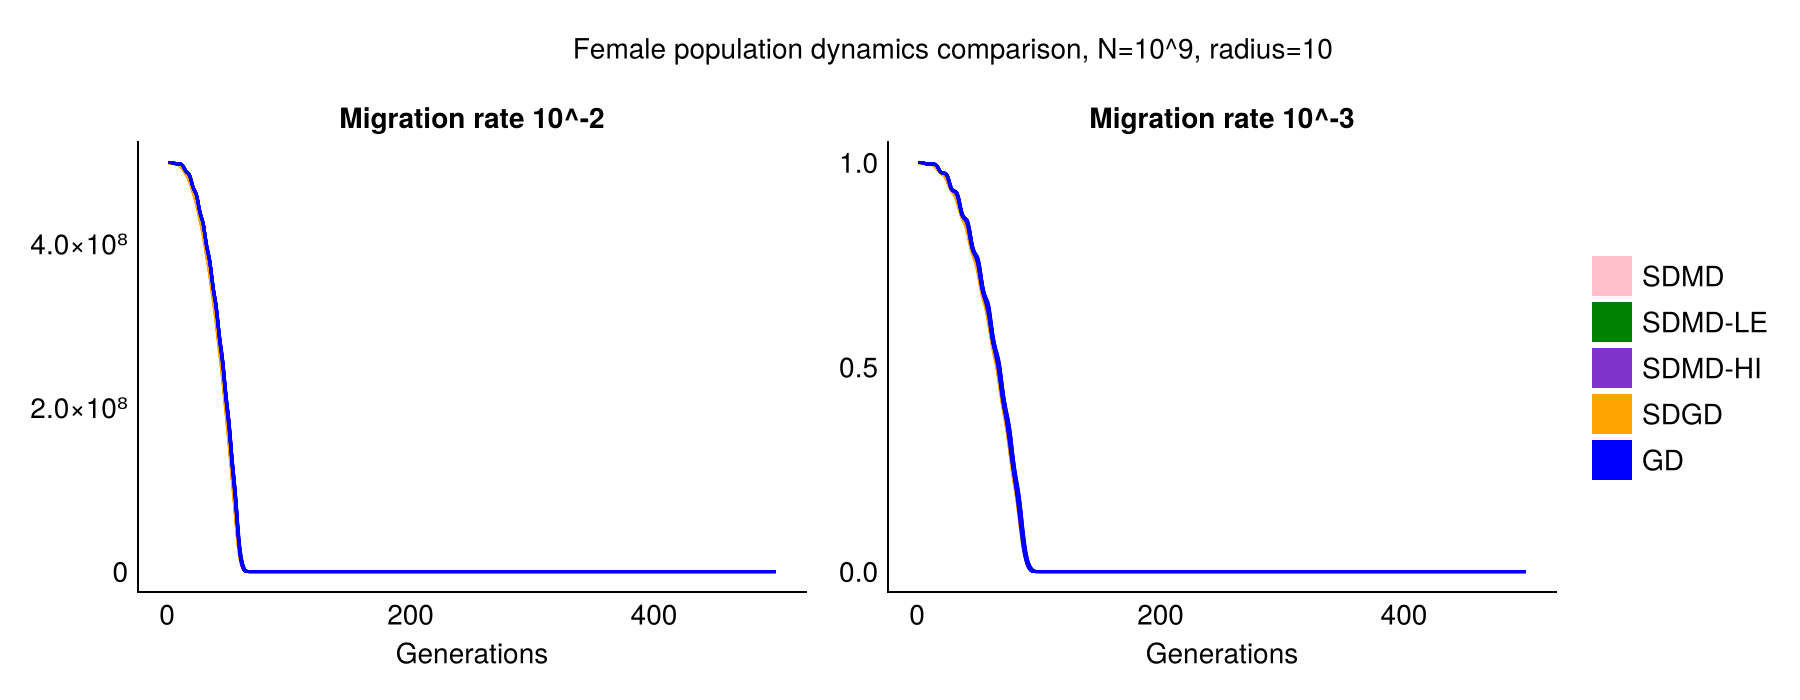

In [127]:
f=Figure(size=(900,350))
Label(f[0,1:3],text="Female population dynamics comparison, N=10^9, radius=10")
ax1=Axis(f[1,1],title="Migration rate 10^-2",xlabel="Generations")#,yscale=Makie.pseudolog10)
ax2=Axis(f[1,2], title="Migration rate 10^-3",xlabel="Generations")#,yscale=log10)
gens=500

for cs in 4:5
    for j in 1:10
        lines!(ax1, 1:gens, [sum(Spj0_9_n_9[cs][j][1,t,:,:]) for t in 1:gens],color=cols17[cs])
        lines!(ax2, 1:gens, [sum(Spj0_9_n_9mig3[cs][j][1,t,:,:])./sum(Spj0_9_n_9mig3[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs])
    end
end
Legend(f[1,3], m_legend,labelt)
#save(string(dir1,"SpMigrationComparison.png"),f)
f

In [81]:
Chasing_j0_mig3=[mean([sum(0.95>sum(Spj0_9_n_9mig3[cs][j][1,end,:,:])./sum(Spj0_9_n_9mig3[cs][j][1,1,:,:])>0) for j in 1:100]) for cs in 1:5]
Elimination_j0_mig3=[mean([sum(sum(Spj0_9_n_9mig3[cs][j][1,end,:,:])./sum(Spj0_9_n_9mig3[cs][j][1,1,:,:])<=0) for j in 1:100]) for cs in 1:5]
Restoration_j0_mig3=[mean([sum(sum(Spj0_9_n_9mig3[cs][j][1,end,:,:])./sum(Spj0_9_n_9mig3[cs][j][1,1,:,:])>=0.95) for j in 1:100]) for cs in 1:5]

zip.(Chasing_j0_mig3,Elimination_j0_mig3,Restoration_j0_mig3,labelt)

5-element Vector{Base.Iterators.Zip{Tuple{Float64, Float64, Float64, String}}}:
 zip(0.08, 0.76, 0.16, "SDMD")
 zip(0.07, 0.82, 0.11, "SDMD-LE")
 zip(0.05, 0.89, 0.06, "SDMD-HI")
 zip(0.0, 1.0, 0.0, "SDGD")
 zip(0.0, 1.0, 0.0, "GD")

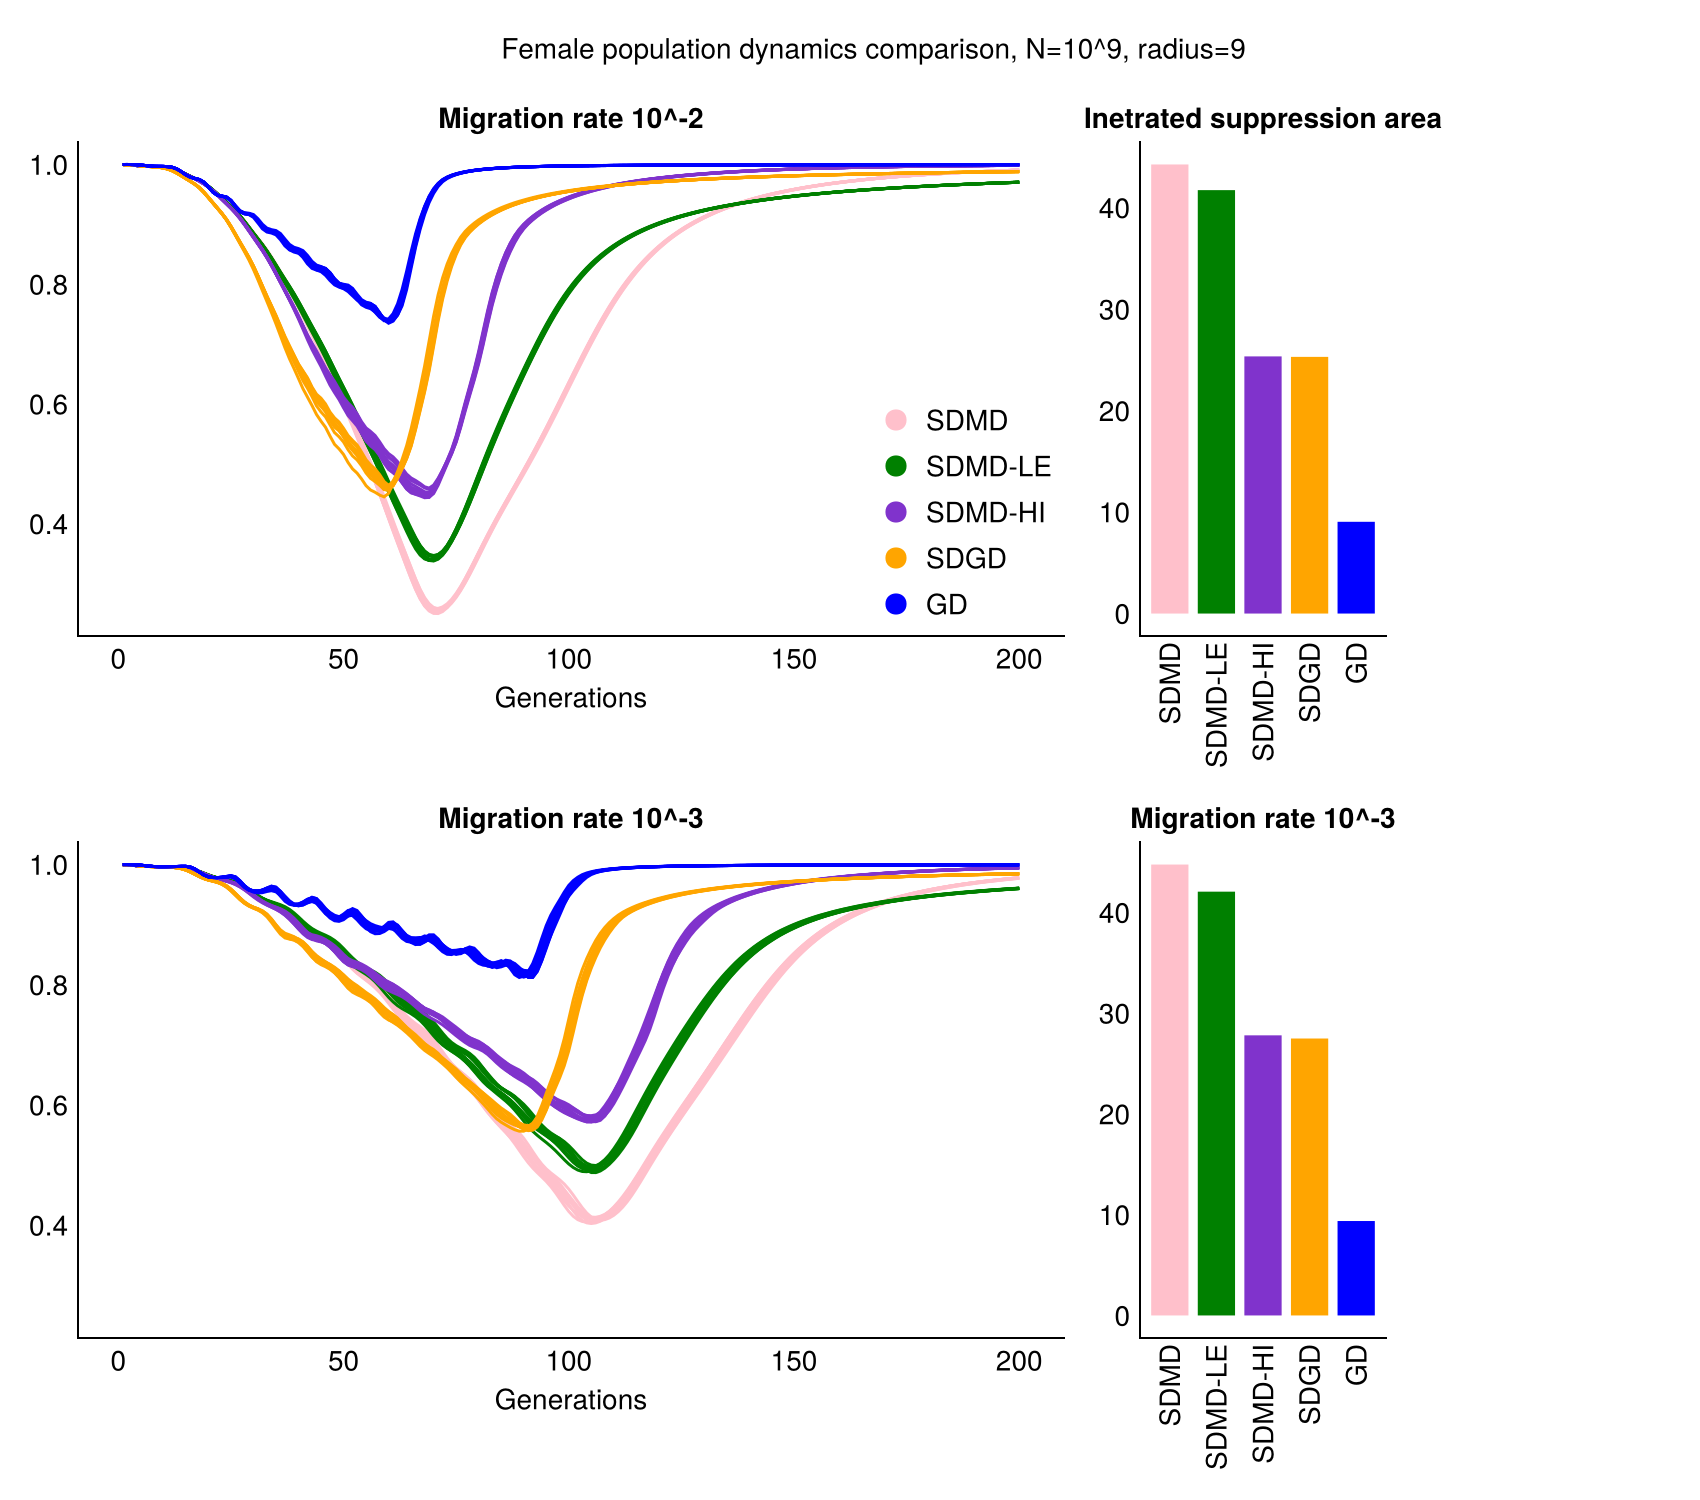

In [157]:
f=Figure(size=(850,750))
Label(f[0,1:3],text="Female population dynamics comparison, N=10^9, radius=9")
ax1=Axis(f[1,1],title="Migration rate 10^-2",xlabel="Generations")
ax2=Axis(f[2,1], title="Migration rate 10^-3",xlabel="Generations")#,yscale=log10)
ax12=Axis(f[1,2],title="Inetrated suppression area",xticks=(1:5,labelt),xticklabelrotation=pi/2)
ax22=Axis(f[2,2], title="Migration rate 10^-3",xticks=(1:5,labelt),xticklabelrotation=pi/2)
gens=200

for cs in 1:5
    for j in 1:10
        lines!(ax1, 1:gens, [sum(Sp_9_n_9[cs][j][1,t,:,:])./sum(Sp_9_n_9[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs])
        scatter!(ax1, 1:gens, [sum(Sp_9_n_9[cs][j][1,t,:,:])./sum(Sp_9_n_9[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs],label=labelt[cs],markersize=15,visible=false)
        lines!(ax2, 1:gens, [sum(Sp_9_n_9mig3[cs][j][1,t,:,:])./sum(Sp_9_n_9[cs][j][1,1,:,:]) for t in 1:gens],color=cols17[cs])
    end
end
barplot!(ax12,1:5,500 .-Int_9_n9,color=cols17)
barplot!(ax22,1:5,500 .-Int_9_n9mig3,color=cols17)
#Legend(f[1,3], m_legend,labelt,valign=:top)
axislegend(ax1,position=:rb,unique=true,merge=true)
ylims!(ax1,0,1)
linkyaxes!(ax1,ax2)
colsize!(f.layout, 1, Relative(2/3))
save(string(dir1,"SpMigrationComparison.png"),f)
f

In [153]:
Int_9_n9=[mean([IntegrateSlope([sum(Sp_9_n_9[cs][j][1,t,:,:])./sum(Sp_9_n_9[cs][j][1,1,:,:]) for t in 1:500];to_gen=500,to_min=false)[1] for j in eachindex(Sp_9_n_9[cs])]) for cs in 1:5]
Int_9_n9mig3=[mean([IntegrateSlope([sum(Sp_9_n_9mig3[cs][j][1,t,:,:])./sum(Sp_9_n_9mig3[cs][j][1,1,:,:]) for t in 1:500];to_gen=500,to_min=false)[1] for j in eachindex(Sp_9_n_9mig3[cs])]) for cs in 1:5]

5-element Vector{Float64}:
 455.2338757121655
 457.9262713616101
 472.19031448523674
 472.5052305228763
 490.62488172537104

In [48]:
p=0.33
Dia=9
t9_n_9_05=[[[TimePerc(r_9_n_9[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in eachindex(r_9_n_9[cs])] for cs in eachindex(r_9_n_9)];
t9_n_9_05mig3=[[[TimePerc(r_9_n_9mig3[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in eachindex(r_9_n_9mig3[cs])] for cs in eachindex(r_9_n_9mig3)];

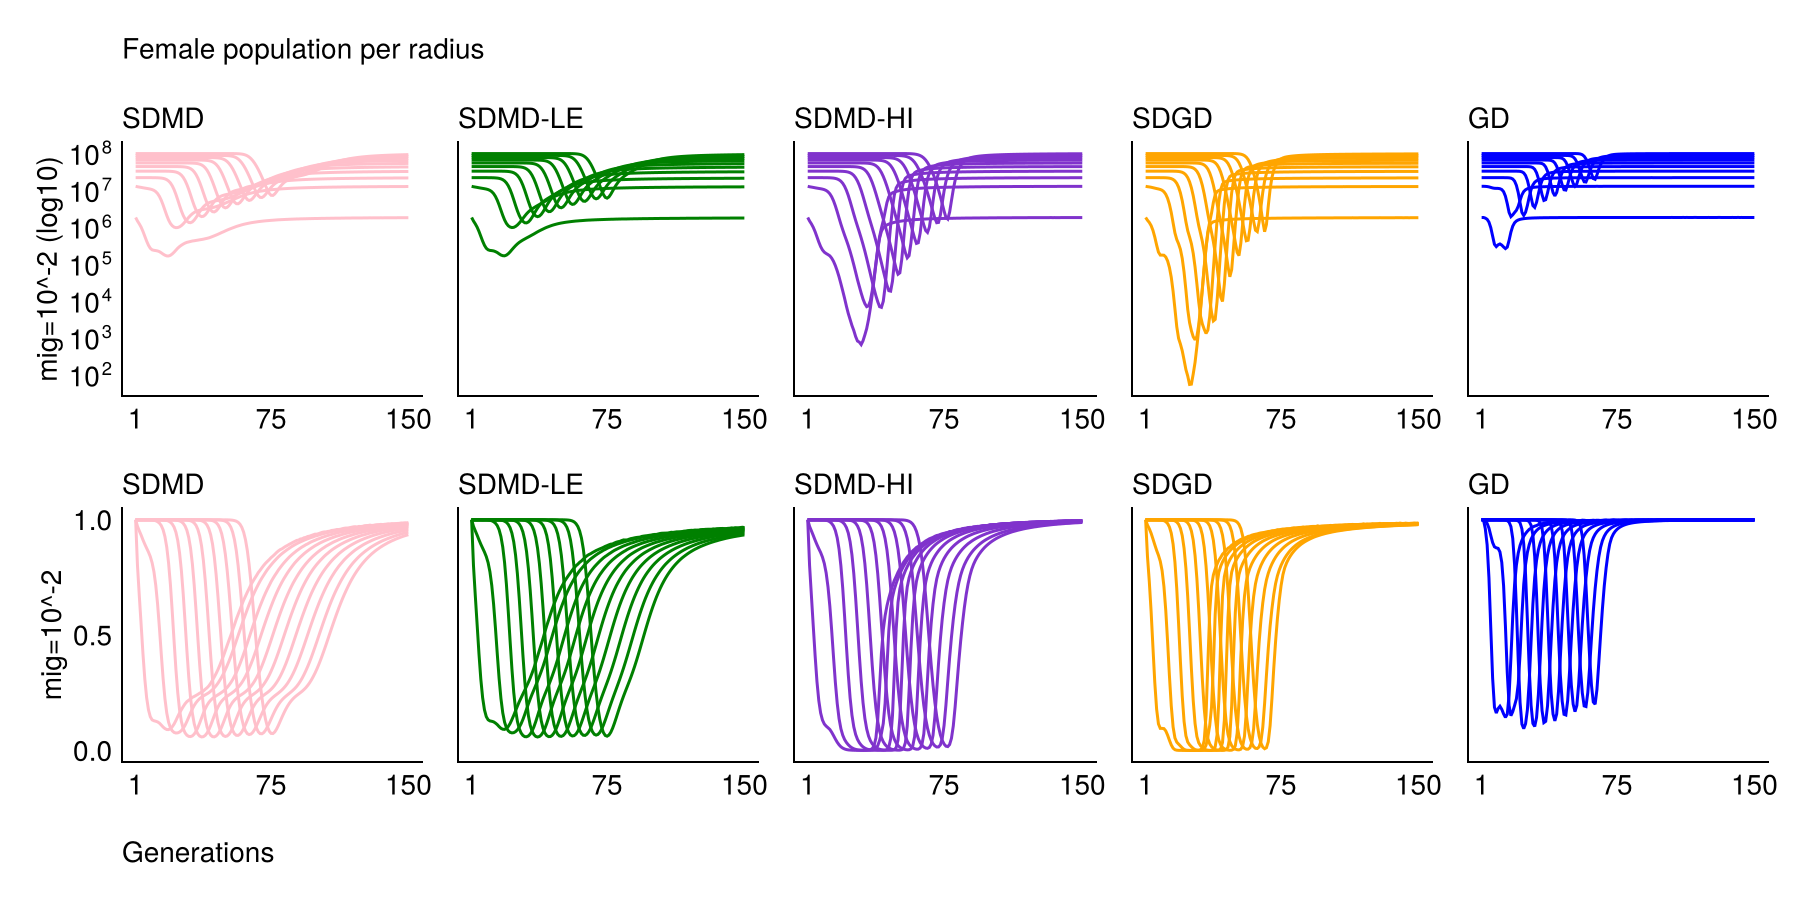

In [55]:
f=Figure(size=(900,450))
gens=150
Label(f[0,1:5],text="Female population per radius",halign=:left)
Label(f[3,1:5],text="Generations",halign=:left)
ax1=[Axis(f[1,j],title=labelt[j],titlealign=:left,xticks=[1,gens/2,gens],titlefont=:regular,ylabel="mig=10^-2 (log10)",yscale=log10) for j in 1:5]
ax2=[Axis(f[2,j],title=labelt[j],titlealign=:left,xticks=[1,gens/2,gens],titlefont=:regular,ylabel="mig=10^-2") for j in 1:5]
for j in 2:5
    hideydecorations!(ax1[j]);hideydecorations!(ax2[j])
end

for cs in 1:5
    for d in 1:10
    lines!(ax1[cs],1:gens,r_9_n_9[cs][1][d][1:gens],color=cols17[cs])#./r_9_n_9[cs][1][d][1]
    lines!(ax2[cs],1:gens,r_9_n_9[cs][1][d][1:gens]./r_9_n_9mig3[cs][1][d][1],color=cols17[cs])
end
end
for j in 2:5 linkaxes!(ax1[j],ax1[1]);end
for j in 2:5 linkaxes!(ax2[j],ax2[1]);end
save(string(dir1,"RadiusPop5cs_v2_log_nonlog_mig2.png"),f)
f

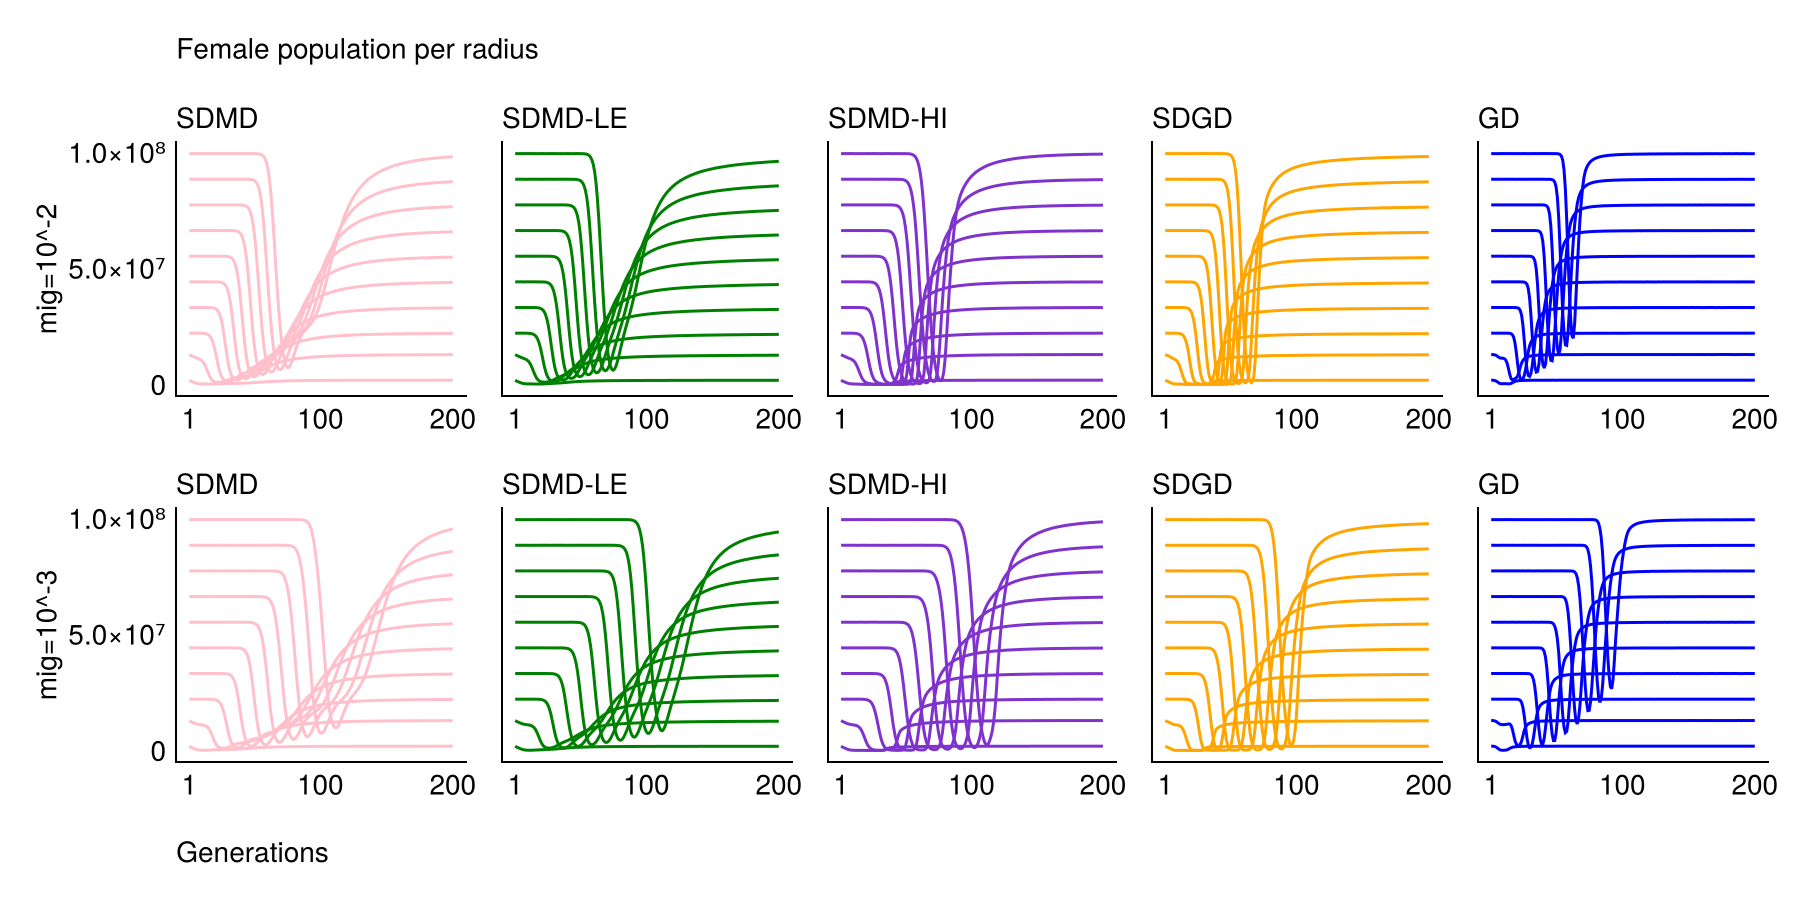

In [59]:
f=Figure(size=(900,450))
gens=200
Label(f[0,1:5],text="Female population per radius",halign=:left)
Label(f[3,1:5],text="Generations",halign=:left)
ax1=[Axis(f[1,j],title=labelt[j],titlealign=:left,xticks=[1,gens/2,gens],titlefont=:regular,ylabel="mig=10^-2") for j in 1:5]
ax2=[Axis(f[2,j],title=labelt[j],titlealign=:left,xticks=[1,gens/2,gens],titlefont=:regular,ylabel="mig=10^-3") for j in 1:5]
for j in 2:5
    hideydecorations!(ax1[j]);hideydecorations!(ax2[j])
end

for cs in 1:5
    for d in 1:10
    lines!(ax1[cs],1:gens,r_9_n_9[cs][1][d][1:gens],color=cols17[cs])#./r_9_n_9[cs][1][d][1]
    lines!(ax2[cs],1:gens,r_9_n_9mig3[cs][1][d][1:gens],color=cols17[cs])#./r_9_n_9mig3[cs][1][d][1]
end
end
for j in 2:5 linkaxes!(ax1[j],ax1[1]);end
for j in 2:5 linkaxes!(ax2[j],ax2[1]);end
save(string(dir1,"RadiusPop5cs_v2.png"),f)
f

In [160]:
p=0.33
t1=[[[TimePerc(r1[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r1)];
t2=[[[TimePerc(r2[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r2)];
jldsave(string(dir1,"T33mig23n9r0.jld2"),true;res=[t1,t2])

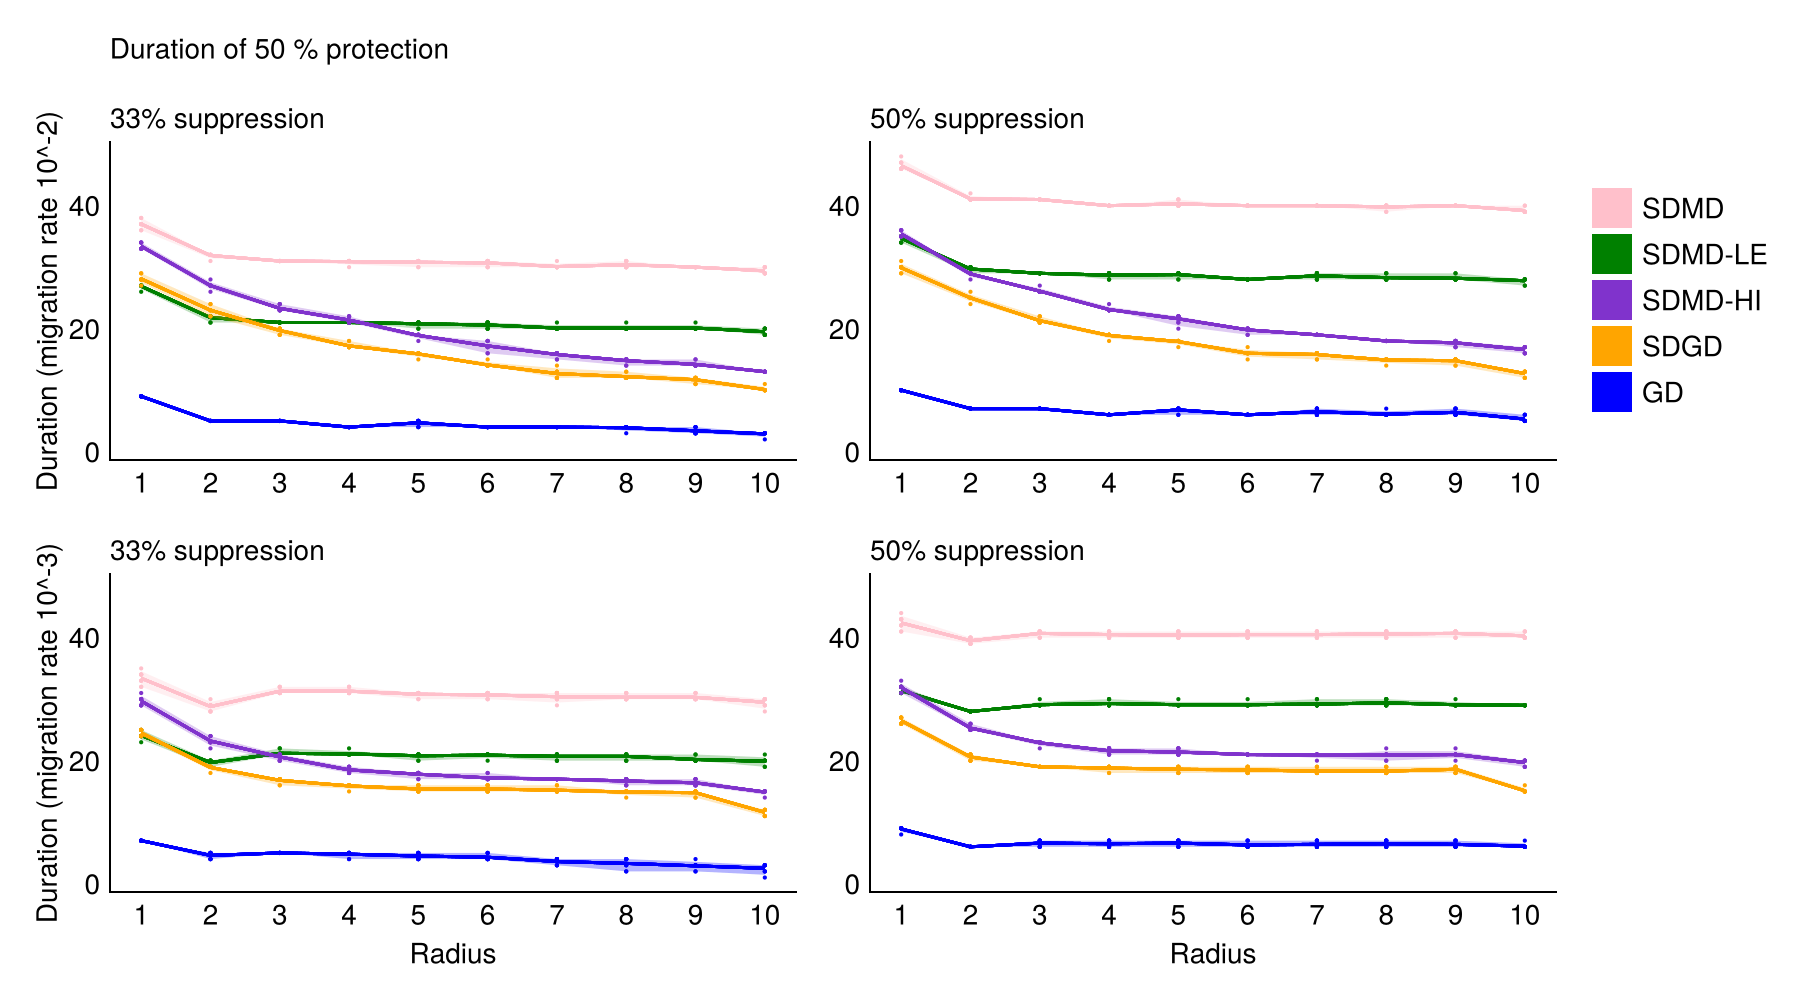

In [158]:
f=Figure(size=(900,500))
ax1=Axis(f[1,1],ylabel="Duration (migration rate 10^-2)",xlabel="",xticks=1:10,title="33% suppression",titlefont=:regular,titlealign=:left)
ax2=Axis(f[1,2],xlabel="",xticks=1:10,title="50% suppression",titlefont=:regular,titlealign=:left)
ax3=Axis(f[2,1],ylabel="Duration (migration rate 10^-3)",xlabel="Radius",xticks=1:10,title="33% suppression",titlefont=:regular,titlealign=:left)
ax4=Axis(f[2,2],xlabel="Radius",xticks=1:10,title="50% suppression",titlefont=:regular,titlealign=:left)
Label(f[0,1:end],text="Duration of 50 % protection",halign=:left)
#Label(f[2,1:end],text="Migration rate=10^-3",halign=:left)
r1=r_9_n_9
r2=r_9_n_9mig3

rep=10

p=0.33
Dia=9
t1=[[[TimePerc(r1[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r1)];
t2=[[[TimePerc(r2[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r2)];

for n in eachindex(t1)
    band!(ax1, 1:Dia+1,quantile.([[last.(t1[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.05),quantile.([[last.(t1[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.95),color=(cols17[n],0.25))
    band!(ax3, 1:Dia+1,quantile.([[last.(t2[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.05),quantile.([[last.(t2[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.95),color=(cols17[n],0.25))
    for j in 1:rep
        scatter!(ax1, 1:Dia+1,last.(t1[n][j]),color=cols17[n],markersize=3)
        lines!(ax1, 1:Dia+1,mean([last.(t1[n][j]) for j in 1:rep]),color=cols17[n])
        scatter!(ax3, 1:Dia+1,last.(t2[n][j]),color=cols17[n],markersize=3)
        lines!(ax3, 1:Dia+1,mean([last.(t2[n][j]) for j in 1:rep]),color=cols17[n])
    end
end
p=0.5
t1=[[[TimePerc(r1[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r1)];
t2=[[[TimePerc(r2[cs][j][d];perc=p) for d in 1:(Dia+1)] for j in 1:rep] for cs in eachindex(r2)];

for n in eachindex(t1)
    band!(ax2, 1:Dia+1,quantile.([[last.(t1[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.05),quantile.([[last.(t1[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.95),color=(cols17[n],0.25))
    band!(ax4, 1:Dia+1,quantile.([[last.(t2[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.05),quantile.([[last.(t2[n][j])[k] for j in 1:rep] for k in 1:Dia+1],0.95),color=(cols17[n],0.25))
    for j in 1:rep
        scatter!(ax2, 1:Dia+1,last.(t1[n][j]),color=cols17[n],markersize=3)
        lines!(ax2, 1:Dia+1,mean([last.(t1[n][j]) for j in 1:rep]),color=cols17[n])
        scatter!(ax4, 1:Dia+1,last.(t2[n][j]),color=cols17[n],markersize=3)
        lines!(ax4, 1:Dia+1,mean([last.(t2[n][j]) for j in 1:rep]),color=cols17[n])
    end
end
Legend(f[1,3], m_legend,labelt)
linkaxes!(ax3,ax2,ax1)
linkaxes!(ax3,ax4)
save(string(dir1,"DurationN9mig2_3_v1.png"),f)
f

Alleles+genotypes

In [172]:
AllelesFreq=function(nvec;sex=:b,M=5,fi=2,mi=4,maxgen=200)
    if M==5
        namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
        namesA=["W","D","N","R","O"]
    elseif M==4
        namesG=["WW","WD","WN","WR","DD","DN","DR","NN","NR", "RR"]
        namesA=["W","D","N","R"]
    end
    ao=[count.(a,namesG) for a in namesA]
    if sex==:b
        al_vec=[[(sum(nvec[fi][t].*ao[a])./sum(nvec[fi][t])+sum(nvec[mi][t].*ao[a])./sum(nvec[mi][t]))./4 for t in 1:maxgen] for a in eachindex(ao)]
    elseif sex==:f
        al_vec =[[sum(nvec[fi][t].*ao[a])./sum(nvec[fi][t])./2 for t in 1:maxgen] for a in eachindex(ao)]
    elseif sex==:m
        al_vec =[[sum(nvec[mi][t].*ao[a])./sum(nvec[mi][t])./2 for t in 1:maxgen] for a in eachindex(ao)] 
    else println("Sex input error, select :b for both, :f for females, :m for males")
    end
    return al_vec
end
GenotypeFreq=function(nvec,g;sex=:b,M=5,fi=2,mi=4,maxgen=200)
    if M==5
        namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
    elseif M==4
        namesG=["WW","WD","WN","WR","DD","DN","DR","NN","NR", "RR"]
    end
    ao=count.(g,namesG) 
    if sex==:b
        al_vec=[(sum(nvec[fi][t].*ao).+sum(nvec[mi][t].*ao)./(sum(nvec[fi][t]).+sum(nvec[mi][t])))./2 for t in 1:maxgen] 
    elseif sex==:f
        al_vec =[sum(nvec[fi][t].*ao)./sum(nvec[fi][t]) for t in 1:maxgen] 
    elseif sex==:m
        al_vec =[sum(nvec[mi][t].*ao)./sum(nvec[mi][t]) for t in 1:maxgen] 
    else println("Sex input error, select :b for both, :f for females, :m for males")
    end
    return al_vec
end
GenotypeNum=function(nvec,g;sex=:b,M=5,fi=2,mi=4,maxgen=200)
    if M==5
        namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
    elseif M==4
        namesG=["WW","WD","WN","WR","DD","DN","DR","NN","NR", "RR"]
    end
    ao=count.(g,namesG) 
    if sex==:b
        al_vec=[(sum(nvec[fi][t].*ao).+sum(nvec[mi][t].*ao)) for t in 1:maxgen] 
    elseif sex==:f
        al_vec =[sum(nvec[fi][t].*ao) for t in 1:maxgen] 
    elseif sex==:m
        al_vec =[sum(nvec[mi][t].*ao) for t in 1:maxgen] 
    else println("Sex input error, select :b for both, :f for females, :m for males")
    end
    return al_vec
end

#1244 (generic function with 1 method)

In [ ]:
#ALLELES COPMPOSITION FOR 3 CONSTRUCTS (EMPIRICAL DATA)
#TWO CLEAVAGE RATES 0.75, 0.95

# version 1 - empirical j,m,hf,hm; c=0.75 c= 0.95, b=0.005 or 0.01
f=Figure(size=(900,550))
supertitle=Label(f[0,1], "Alleles composition",fontsize=17,halign = :left,tellwidth=false)
ax1=Axis(f[1,1],title="   SDMD",ylabel="Allele frequency (c=0.75)", titlealign = :left,xlabel="",xticklabelsvisible=false)
ax2=Axis(f[1,2],title="   SDGD",ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax3=Axis(f[1,3],title="   GD",ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax4=Axis(f[2,1],title="",ylabel="Allele frequency (c=0.95)", xlabel="Generations")
ax5=Axis(f[2,2],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)
ax6=Axis(f[2,3],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)
gen=150
#col4=cgrad(:bwr,4, categorical=true)[1:4]#[:blue,:green,:yellow,:red]#cgrad(:Paired_11,
#col4=cgrad(:rainbow1,4,categorical=true)[1:4]
col4=[:lightblue,cgrad(:greens,5)[2],:pink,:red]
alpha=1

b=2
ax1_=[ax1,ax2,ax3]
ax2_=[ax4,ax5,ax6]
cms1=[[cumsum(AllelesFreq(DXmods_Balleles[rw][cs])) for cs in 1:3] for rw in [1,3]]
for a in [4:-1:1;]
    for cs in 1:3
    barplot!(ax1_[cs], 1:gen,cms1[1][cs][a][1:gen], color=(col4[a],alpha),gap=0) #b=0.01 c=0.75
    barplot!(ax2_[cs], 1:gen,cms1[2][cs][a][1:gen], color=(col4[a],alpha),gap=0)  #b=0.01 c=0.95
    end
end
legA=[PolyElement(color = (col4[a],0.8),size=30) for a in 1:4];
Legend(f[3, 3], legA, ["W","D","R2","R1"],"Alleles",rowgap=15,align=:right,titleposition=:left,orientation=:horizontal)
Box(f[3, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)

hidespines!(ax1,:b);hidespines!(ax2);hidespines!(ax3);hidespines!(ax5,:l);hidespines!(ax6,:l)
f
save(string(dir1,"Alleles.png"),f)

In [ ]:
N0=10^15
Runs_Nosp_dx(;N=N0,r1=0.5,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Agd") ;
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=1,hN=1,hDR=1,hm=0,A=0,filename1="Asdmdhi") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=1,hN=0,hDR=0,hm=0,A=0,filename1="Asdmdle") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Asdgd") ;

Runs_Nosp_dx(;N=N0,r1=0.5,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Agd") ;
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=1,hDR=1,hm=0,A=0,filename1="Asdmdhi") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hDR=0,hm=0,A=0,filename1="Asdmdle") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Asdgd") ;

Runs_Nosp_dx(;N=N0,r1=0.5,rep=10,C=0.95,B=0,J=0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Agd") ;
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=0,J=0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0,J=0.035,F=12,hf=1,hN=1,hDR=1,hm=0,A=0,filename1="Asdmdhi") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0,J=0.035,F=12,hf=1,hN=0,hDR=0,hm=0,A=0,filename1="Asdmdle") ;
Runs_Nosp_dx(;N=N0,r1=0.9,rep=10,C=0.95,B=0,J=0.035,F=12,hf=0,hN=0,hDR=0,hm=0,A=0,filename1="Asdgd") ;

In [200]:
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=1,J=0.005*0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=0.005,J=0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;
Runs_Nosp_dx2(;N=N0,r1=0.9,rep=10,C=0.95,B=0,J=0.035,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1="Asdmd") ;


In [11]:
for J in [0.001,0.005,0.035,0.01]
    for N0 in 10 .^[3.0,3.25,3.5,3.75,4.0,4.5,5.0,5.5,6.0,6.5]
        pre=string("AN",log10(N0))
        Runs_Nosp_dx2(;N=N0,r1=0.9,rep=500,C=0.95,B=0,J=J,F=12,hf=1,hN=0,hm=0,hDR=1,A=0,filename1=string(pre,"sdmd"),Release=0.25 );
        Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0,J=J,F=12,hf=1,hN=1,hDR=1,hm=0,A=0,filename1=string(pre,"sdmdhi") ,Release=0.25 );
        Runs_Nosp_dx(;N=N0,r1=0.9,rep=500,C=0.95,B=0,J=J,F=12,hf=1,hN=0,hDR=0,hm=0,A=0,filename1=string(pre,"sdmdle"),Release=0.25 );
    end
end


Progress: 100%|█████████████████████████████████████████| Time: 0:00:58K
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55
Progress: 100%|█████████████████████████████████████████| Time: 0:00:55


In [14]:
#Asdgd_m0.9_hf0_hN0_hm0_A0_C0.95_B0_J0.035
names_upload=[
    ["sdmd","1","0","0.9"],["sdmdle","1","0","0.9"],["sdmdhi","1","1","0.9"],["sdgd","0","0","0.9"],["gd","0","0","0.5"]
];
Upload_5=function(;pre="A",c=0.95,j=0.035,b=0.005, inds=1:5)
    y=
    [load(string(dir1,string(pre),names_upload[cs][1],"_m",names_upload[cs][4],"_hf",names_upload[cs][2],"_hN",names_upload[cs][3],"_hm0_A0_C",c,"_B",b,"_J",j,".jld2"))["models1"]
    for cs in inds]
return y
end


#488 (generic function with 1 method)

In [15]:
#Acs=Upload_5(;c=0.95,b=0.005,j=0.035);
#Acsb0=Upload_5(;c=0.95,b=0,j=0.035,pre="AN3.25")[1:3];
nvec=[3.0,3.25,3.5,3.75,4.0,4.5,5.0,5.5,6.0]
Acsb0_n=[Upload_5(;c=0.95,b=0,j=0.035,pre=string("AN",n),inds=1:3) for n in nvec];
Acsb0_n_j01=[Upload_5(;c=0.95,b=0,j=0.01,pre=string("AN",n),inds=1:3) for n in nvec];
Acsb0_n_j005=[Upload_5(;c=0.95,b=0,j=0.005,pre=string("AN",n),inds=1:3) for n in nvec];
Acsb0_n_j001=[Upload_5(;c=0.95,b=0,j=0.001,pre=string("AN",n),inds=1:3) for n in nvec];

In [16]:
set_theme!(theme_minimal())

colW=(cgrad(:winter, categorical=true,3)[1],0.9)#(cgrad(:blues,5,categorical=true)[1],1)
colW2=[(cgrad(:winter,3,categorical=true)[1],(a+1)/5) for a in 5:-1:1]#(cgrad(:winter,3,categorical=true)[1],0.7)
col5=RGBf(0.5, 0.2, 0.8)#cgrad(:viridis, categorical=true,3)[3]
col6=:pink
col7=:orange
cols17=[colW2[1],:green,col5,col6,col7]
labelt= ["SDMD","SDMD-LE","SDMD-HI","SDGD","GD"];

m_legend=[PolyElement(color = cols17[i],size=19,marker=:circle) for i in 1:length(cols17)];

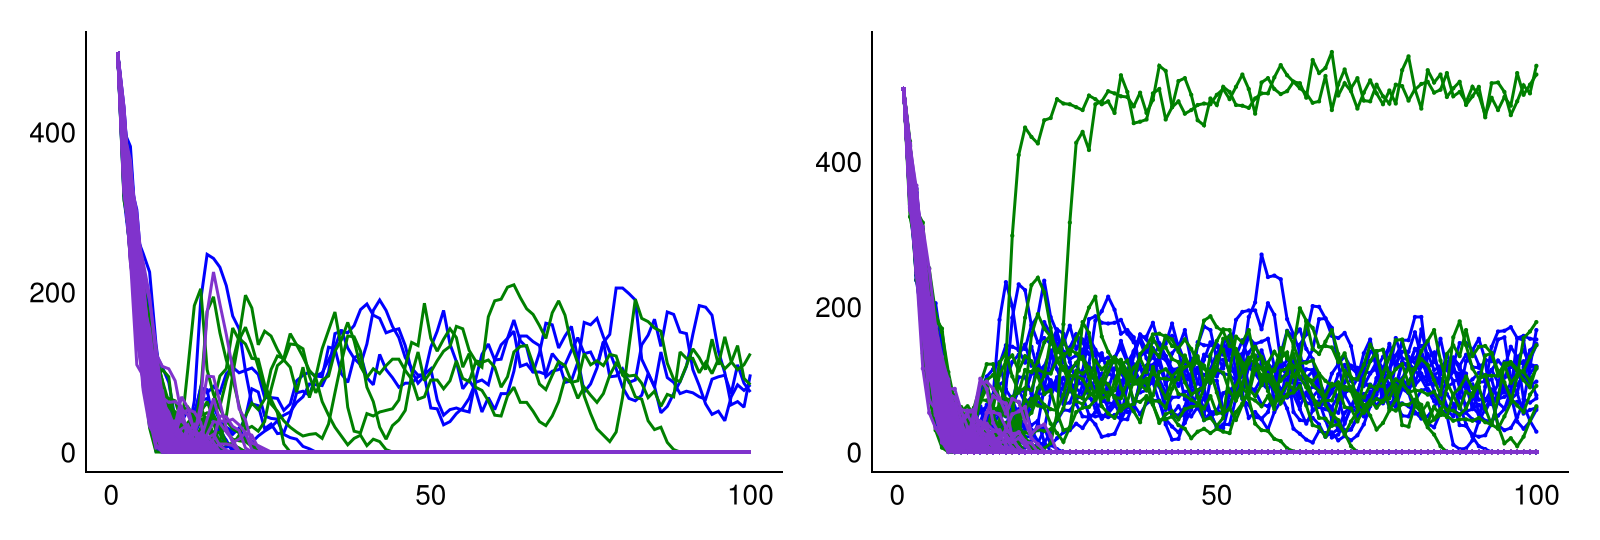

In [17]:
f=Figure(size=(800,270))
ax1=Axis(f[1,1])
ax2=Axis(f[1,2])
gens=40
n=1
for cs in 1:3
    for j in 1:100
    gens=100
    lines!(ax1, 1:gens,sum.(Acsb0_n_j005[n][cs][j][1][1:gens]), color=cols17[cs],markersize=1+5*(cs==1))
    gens=100
    scatterlines!(ax2, 1:gens,sum.(Acsb0_n_j01[n][cs][j][1][1:gens]), color=cols17[cs],markersize=3)
    end
    #lines!(ax,2 1:gens,sum.(Acsj0[cs][1][1][1:gens]), color=cols17[cs])
end
f

In [383]:
#Estimating probability of equilibrium/elimmination/loss for sdmd-type constructs
nvec=10 .^[3.0,3.25,3.5,3.75,4.0,4.5,5.0,5.5,6.0]
Bars_outcome(vec;nvec,lowerlim=0, upperlim=0.95)=
[[cumsum([mean([sum(vec[n][cs][j][1][end]).<=lowerlim*nvec[n]/2 for j in eachindex(vec[n][cs])]),mean([upperlim*nvec[n]/2 .>sum(vec[n][cs][j][1][end]).>lowerlim*nvec[n]/2 for j in eachindex(vec[n][cs])]),mean([sum(vec[n][cs][j][1][end]).>=upperlim*nvec[n]/2 for j in eachindex(vec[n][cs])])]) for cs in eachindex(vec[n])] for n in eachindex(vec)];

Bars_outcome_boot=function(vec;nvec,lowerlim=0, upperlim=0.95,boot=1000,cs=1,alpha=0.05)
    nn=length(nvec)
    resn=repeat([zeros(3)],nn)
    for n in 1:nn
        temp=zeros(boot)
        ll=length(vec[n][cs])
        for b in 1:boot
            bs=vec[n][cs][sample(1:ll,ll)] 
            temp[b]=mean([nvec[n]/2*lowerlim<sum(bs[j][1][end])<=upperlim*nvec[n]/2 for j in 1:ll]);
        end
        resn[n]=[mean(temp),quantile(temp,alpha/2),quantile(temp,1-alpha/2)]#2*mean(temp)-
    end
    return resn
end

temp=[Bars_outcome_boot(Acsb0_n_j001;nvec=nvec),Bars_outcome_boot(Acsb0_n_j005;nvec=nvec),Bars_outcome_boot(Acsb0_n_j01;nvec=nvec),Bars_outcome_boot(Acsb0_n;nvec=nvec)];


In [18]:
f=Figure(size=(600,370))
ax1=Axis(f[1,1],xscale=log10,title="SDMD, SDMD-LE probability of equlibrium (b=0)",titlealign=:left, titlefont=:regular)
jvec=[0.001,0.005,0.035,0.01]
jcol=cgrad(:reds,4,categorical=true)
for j in 1:4
    scatterlines!(ax1, nvec,[temp[j][n][1] for n in eachindex(nvec)],color=jcol[j],label=string(jvec[j]))
    band!(ax1, nvec,[temp[j][n][3] for n in eachindex(nvec)],[temp[j][n][2] for n in eachindex(nvec)],color=(jcol[j],0.3))
end
axislegend("NHEJ rate",position=:rb)
save(string(dir1,"J0OutcomeSDMDEq.png"),f)
f

UndefVarError: UndefVarError: `temp` not defined

In [222]:
#cms1=[[cumsum(AllelesFreq(DXmods_Balleles[rw][cs])) for cs in 1:3] for rw in [1,3]]
model=Acs
namesG=["WW","WD","WN","WR","WO","DD","DN","DR","DO","NN","NR","NO", "RR","RO","OO"]
Ginds=findall(x->(count.("O",x)==0),namesG)
println(namesG[Ginds])
maxgen=300
GentsF=[[GenotypeFreq(model[cs][1],namesG[g];sex=:f,M=5,fi=1,mi=3,maxgen=maxgen) for g in Ginds] for cs in 1:5]
GentsFnum=[[GenotypeNum(model[cs][1],namesG[g];sex=:f,M=5,fi=1,mi=3,maxgen=maxgen) for g in Ginds] for cs in 1:5]
cms1=[[cumsum([GentsF[cs][g][t] for g in 1:10]) for t in eachindex(GentsF[1][1])] for cs in 1:5];
cms1num=[[cumsum([GentsFnum[cs][g][t] for g in 1:10]) for t in eachindex(GentsF[1][1])] for cs in 1:5];

GentsM=[[GenotypeFreq(model[cs][1],namesG[g];sex=:m,M=5,fi=1,mi=3,maxgen=maxgen) for g in Ginds] for cs in 1:5]
GentsMnum=[[GenotypeNum(model[cs][1],namesG[g];sex=:m,M=5,fi=1,mi=3,maxgen=maxgen) for g in Ginds] for cs in 1:5]
cms1M=[[cumsum([GentsM[cs][g][t] for g in 1:10]) for t in eachindex(GentsF[1][1])] for cs in 1:5];
cms1Mnum=[[cumsum([GentsMnum[cs][g][t] for g in 1:10]) for t in eachindex(GentsF[1][1])] for cs in 1:5];


["WW", "WD", "WN", "WR", "DD", "DN", "DR", "NN", "NR", "RR"]


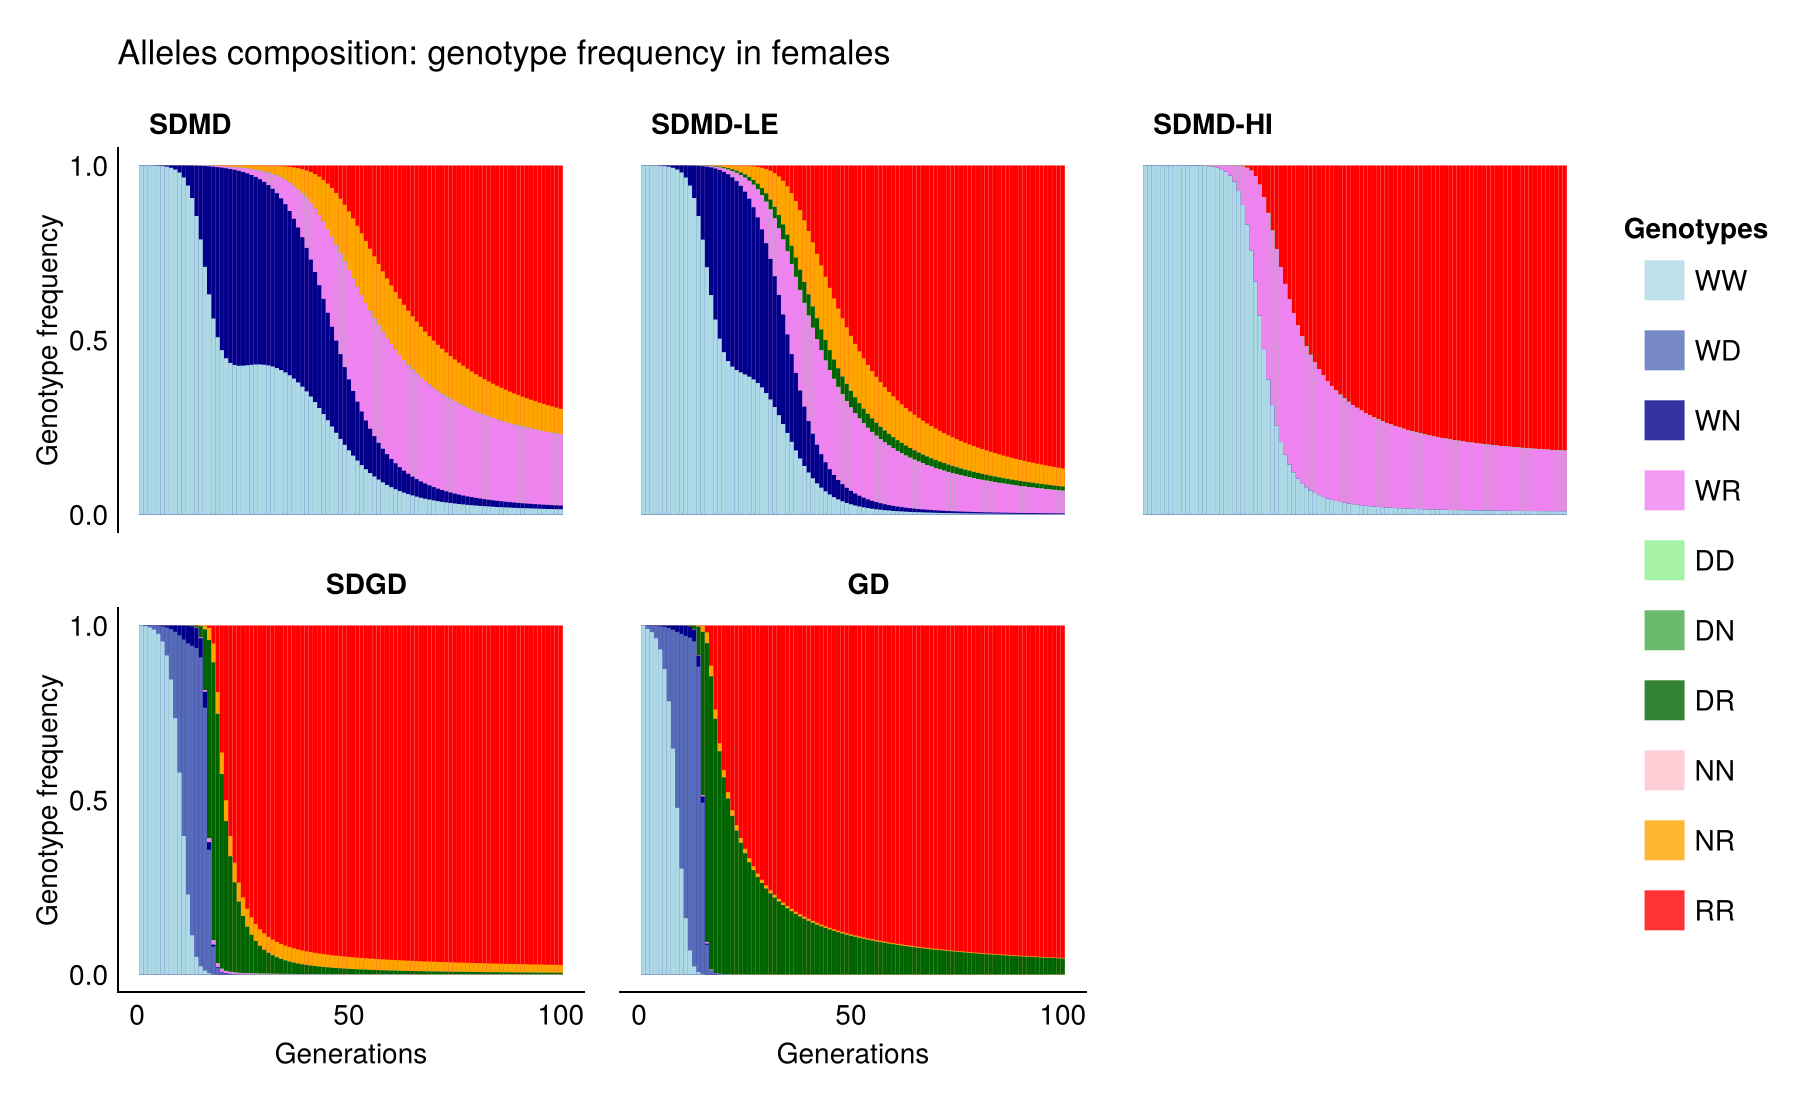

In [210]:
#ALLELES COPMPOSITION FOR 3 CONSTRUCTS (EMPIRICAL DATA)
#TWO CLEAVAGE RATES 0.75, 0.95

# version 1 - empirical j,m,hf,hm; c=0.75 c= 0.95, b=0.005 or 0.01
f=Figure(size=(900,550))

supertitle=Label(f[0,1], "Alleles composition: genotype frequency in females",fontsize=17,halign = :left,tellwidth=false)
ax1=Axis(f[1,1],title=string("    ",labelt[1]),ylabel="Genotype frequency", titlealign = :left,xlabel="",xticklabelsvisible=false)
ax2=Axis(f[1,2],title=string("    ",labelt[2]),ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax3=Axis(f[1,3],title=string("    ",labelt[3]),ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax4=Axis(f[2,1],title=string("    ",labelt[4]),ylabel="Genotype frequency", xlabel="Generations")
ax5=Axis(f[2,2],title=string("    ",labelt[5]),ylabel="", xlabel="Generations",yticklabelsvisible=false)
ax6=Axis(f[2,3],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)
gen=100
#col4=cgrad(:bwr,4, categorical=true)[1:4]#[:blue,:green,:yellow,:red]#cgrad(:Paired_11,
#col4=cgrad(:rainbow1,4,categorical=true)[1:4]
col4=[:lightblue,cgrad(:greens,5)[2],:pink,:red]
col10=vcat(cgrad(:blues,3 ,categorical=true)[1:3],:violet,cgrad(:greens,3,categorical=true)[1:3],[:pink],[:orange],[:red])
alpha=1

ax1_=[ax1,ax2,ax3,ax4,ax5]
#ax2_=[ax4,ax5,ax6]
for a in [10:-1:1;]
    for cs in 1:5
    barplot!(ax1_[cs], 1:gen,[cms1[cs][t][a] for t in 1:gen], color=(col10[a],alpha),gap=0) #b=0.01 c=0.75
    end
end
legA=[PolyElement(color = (col10[a],0.8),size=30) for a in 1:10];
Legend(f[1:2, 4], legA, namesG[Ginds],"Genotypes",rowgap=15,align=:right,titleposition=:top)

hidespines!(ax1,:b);hidespines!(ax2);hidespines!(ax3);hidespines!(ax5,:l);hidedecorations!(ax6);hidespines!(ax6)

save(string(dir1,"AllelesFFr_v1.png"),f)
f

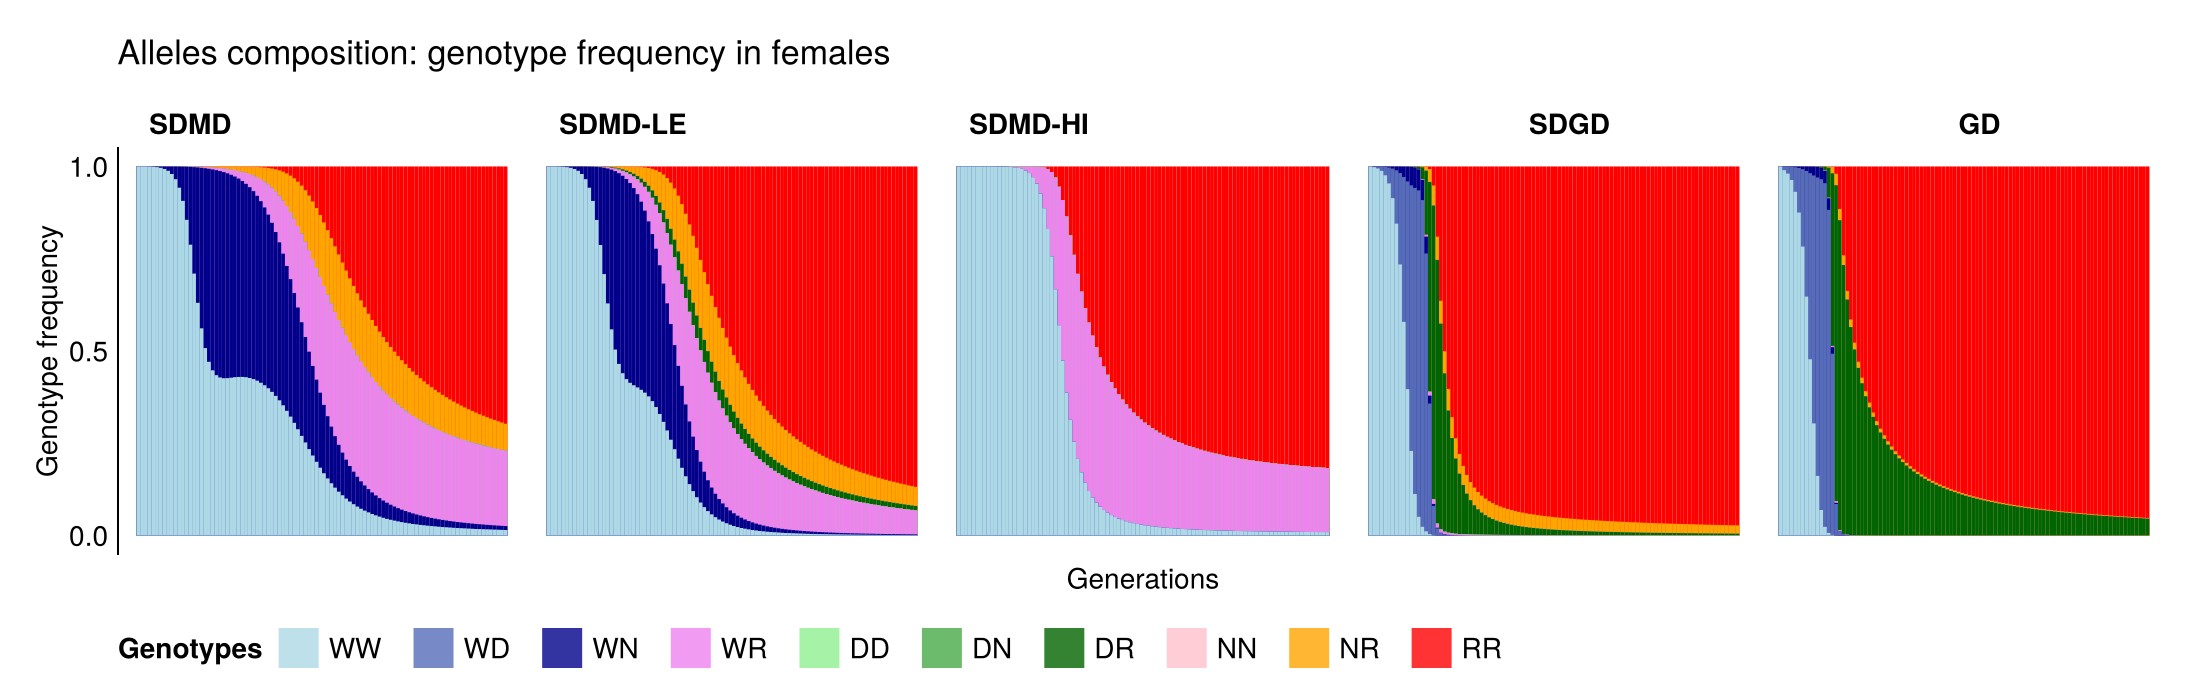

In [238]:
#ALLELES COPMPOSITION FOR 3 CONSTRUCTS (EMPIRICAL DATA)
#TWO CLEAVAGE RATES 0.75, 0.95

# version 1 - empirical j,m,hf,hm; c=0.75 c= 0.95, b=0.005 or 0.01
f=Figure(size=(1100,350))

supertitle=Label(f[0,1], "Alleles composition: genotype frequency in females",fontsize=17,halign = :left,tellwidth=false)
ax1=Axis(f[1,1],title=string("    ",labelt[1]),ylabel="Genotype frequency", titlealign = :left,xlabel="",xticklabelsvisible=false)
ax2=Axis(f[1,2],title=string("    ",labelt[2]),ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax3=Axis(f[1,3],title=string("    ",labelt[3]),ylabel="", xlabel="Generations",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax4=Axis(f[1,4],title=string("    ",labelt[4]),ylabel="", xlabel="",yticklabelsvisible=false,xticklabelsvisible=false)
ax5=Axis(f[1,5],title=string("    ",labelt[5]),ylabel="",yticklabelsvisible=false,xticklabelsvisible=false)
#ax6=Axis(f[2,3],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)
gen=100
#col4=cgrad(:bwr,4, categorical=true)[1:4]#[:blue,:green,:yellow,:red]#cgrad(:Paired_11,
#col4=cgrad(:rainbow1,4,categorical=true)[1:4]
col4=[:lightblue,cgrad(:greens,5)[2],:pink,:red]
col10=vcat(cgrad(:blues,3,categorical=true)[1:3],:violet,cgrad(:greens,3,categorical=true)[1:3],[:pink],[:orange],[:red])
alpha=1

ax1_=[ax1,ax2,ax3,ax4,ax5]
for a in [10:-1:1;]
    for cs in 1:5
    barplot!(ax1_[cs], 1:gen,[cms1[cs][t][a] for t in 1:gen], color=(col10[a],alpha),gap=0) #b=0.01 c=0.75
    end
end
legA=[PolyElement(color = (col10[a],0.8),size=30) for a in 1:10];
Legend(f[2, 1:5], legA, namesG[Ginds],"Genotypes",align=:right,orientation=:horizontal,halign=:left,titleposition=:left,valign=:top,rowgap=15)
for a in [ax2,ax3,ax4,ax5] linkyaxes!(ax1,a); end
hidespines!(ax1,:b);hidespines!(ax2);hidespines!(ax3);hidespines!(ax5);hidespines!(ax4);#hidedecorations!(ax6);hidespines!(ax6)
colgap!(f.layout, 1)
save(string(dir1,"AllelesFFr_v2.png"),f)
f

In [ ]:
#ALLELES COPMPOSITION FOR 3 IDEALISED CONSTRUCTS
#SPECIAL CASE 1 no R1 no R2
#special case 2 no R2
#Transformation
yfunc2=function(x)
    if x<1
    y=log10(x/(1-x))
    else y=5
    end
    return y
end

# version 1 - empirical j,m,hf,hm; c=0.75 c= 0.95, b=0.005 or 0.01
f=Figure(size=(900,500))
supertitle=Label(f[0,1], "Alleles and genotype composition, j=0, b=0 ",fontsize=17,halign = :left,tellwidth=false)
ax1=Axis(f[1,1],title="   SDMD",ylabel="Allele frequency", titlealign = :left,xlabel="",xticklabelsvisible=false)
ax2=Axis(f[1,2],title="   SDGD",ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax3=Axis(f[1,3],title="   GD",ylabel="", xlabel="",titlealign = :left,yticklabelsvisible=false,xticklabelsvisible=false)
ax4=Axis(f[2,1],title="",ylabel="Genotype relative count", xlabel="Generations")
ax5=Axis(f[2,2],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)
ax6=Axis(f[2,3],title="",ylabel="", xlabel="Generations",yticklabelsvisible=false)

gen=30
col4=[:lightblue,cgrad(:greens,5)[2],:pink,:red]
alpha=1

b=3
ax1_=[ax1,ax2,ax3]
ax2_=[ax4,ax5,ax6]
for a in [2:-1:1;]
    for cs in 1:3
        lines!(ax1_[cs], 1:gen,yfunc2.(alCase1[1][cs][a][1:gen]), color=(col4[a],alpha),linewidth=2,label="a=0%")
        #lines!(ax1_[cs], 1:gen,yfunc2.(alCase1[2][cs][a][1:gen]), color=(col4[a],alpha),linewidth=2,linestyle=:dash,label="a=1%") 
    end
    #lines!(ax1_[1], 1:gen,yfunc2.(alCase1[1][4][a][1:gen]), color=(col4[a],alpha),linewidth=2) 
    #lines!(ax1_[1], 1:gen,yfunc2.(alCase1[2][4][a][1:gen]), color=(col4[a],alpha),linewidth=2,linestyle=:dash) 

end

colG=[:blue,:violet,:green]
for g in 1:3
    for cs in 1:3
        #lines!(ax2_[cs], 1:gen,alCase1g[1][cs][g][1:gen]./(10^10), color=(colG[g],alpha),linewidth=2,linestyle=:solid) 
        lines!(ax2_[cs], 1:gen,Case1F[1][cs][1:gen]./(10^10/2), color=(:grey,alpha),linewidth=1,linestyle=:dash,label="Rel females") 
        
    end
    #lines!(ax2_[1], 1:gen,alCase1g[1][4][g][1:gen], color=(colG[g],alpha),linewidth=2) 
end
axislegend(ax2_[1],unique=true,merge=true,position=:rt)

gen=150

legA=[PolyElement(color = (col4[a],0.8),size=30) for a in 1:4];
legG=[PolyElement(color = (colG[a],0.8),size=30) for a in 1:3];

Legend(f[3, 3], legA, ["W","D","R2","R1"],"Alleles",rowgap=15,align=:right,titleposition=:left,orientation=:horizontal)
Legend(f[3, 2], legG, ["WW","WD","DD"],"Genotypes",rowgap=15,align=:right,titleposition=:left,orientation=:horizontal)
Box(f[3, 1:3],color=(:white,0),strokewidth = 1,strokecolor=:lightgrey)
for ax in ax1_ ylims!(ax,-2.5,2.5); end
for ax in ax2_ ylims!(ax,0,1); end
hidespines!(ax1,:b);hidespines!(ax2);hidespines!(ax3);hidespines!(ax5,:l);hidespines!(ax6,:l)
f